## Project Overview

<img src="https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/Rossmann%20Store.png?raw=true">

This project is about **Rossmann Store Sales Prediction**! wherein we will be building a **Prediction** model.

**Rossmann** operates over **3,000 drug stores** in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to **six weeks** in advance.

Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

So **Rossmann** wants us to predict **6 weeks** of daily sales for **1,115 stores** located across **Germany**. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation.

By helping Rossmann create a robust prediction model, we can help store managers stay focused on what's most important to them: their customers and their teams!
Currently there is a human element involved here (in forecasting sales by managers), so Rossmann wants to **standardize this process** to minimize error.


## Project Roadmap

![](https://i.imgur.com/kKdAALX.png)


In this project, we'll explore a step-by-step process for approaching this Machine Learning problem, by following these steps:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as Supervised/Unsupervised and Regression/Classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create Training/Test/Validation sets and prepare the data for training ML models.
5. Create a quick & easy Baseline Model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.


### Importing Dependencies

Let's install and import the required libraries.

In [1]:
!pip install numpy pandas-profiling matplotlib plotly seaborn --upgrade --quiet
!pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1

Now lets restart the kernel:

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.models import Sequential
from keras.callbacks import History
from keras.layers import Dense,Activation,Dropout

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

### Step 1 : Understand Business Requirements & Nature of Data

<img src="https://i.imgur.com/63XEArk.png" width="640">


Most machine learning models are trained to serve a real-world use case. **Kaggle** is a great place to find such use cases to experiment on. It's important to understand the business requirements, modeling objectives and the nature of the data available before we start building a machine learning model.

#### Understanding the Big Picture

The first step in any machine learning problem is to understand the big picture. For that we can just start with asking few questions and talk to various stakeholders and identify the following:

1. What is the **business problem** we're trying to solve using machine learning?
2. **Why** are we interested in solving this problem? What impact will it have on the business?
3. How is this **problem solved currently**, without any machine learning tools?
4. **Who** will use the results of this model, and how does it fit into other business processes?
5. **How much **historical data do we have, and how was it collected?
6. **What features **does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some **known issues** with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? **How representative** are they of the entire dataset.
9. **Where** is the data stored and how will we get access to it?
10. and so on...


We can gather as much information about the problem as possible, so that we've clear understanding of the objective and feasibility of the project.

As explained in the project overview above, **Rossmann** wants us to predict **6 weeks** of daily sales for **1,115 stores** located across **Germany**. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation.

### Step 2 : Problem Identification

<img src="https://i.imgur.com/rqt2A7F.png" width="640">

Here's the landscape of machine learning:

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the different kinds of models to be used in machine learning depending on the given use-case:

<img src="https://i.imgur.com/VbVFAsg.png" width="640">




So this is clearly a **Supervised Learning and a Regression problem**. We are trying to guess a continuous number rather than a category.

#### Loss Functions and Evaluation Metrics

Now we need to pick an appropriate evaluation metric. So depending on the kind of model we will train, our model will also use a loss/cost
function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model. In this project our evaluation metric will be "**mean_squared_error**" and "**root_mean_squared_error**"

* **Loss functions** - they're used by computers to optimize the ML model. In this project we will take "**mean_absolute_error**" and "**mean_squared_error**" as loss functions

It is important to notice that the Evaluation metrics and the Loss functions are often the same (e.g. **RMSE** for regression problems), but they can be different (e.g. **Cross Entropy** and **Accuracy** for classification problems).

#### Data Description
Most of the fields in **train.csv** are self-explanatory. The following are descriptions for those that aren't.

*  **Id** - an Id that represents a (Store, Date) tuple within the training set

*  **Store** - a unique Id for each store

*  **Sales** - the turnover for any given day (this is what we are predicting)

*  **Customers** - the number of customers on a given day

*  **Open** - an indicator for whether the store was open:
      * 0 = closed
      * 1 = open
*  **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.
      * a = public holiday
      * b = Easter holiday
      * c = Christmas
      * 0 = None

*  **SchoolHoliday** - indicates if the Store was affected by the closure of public schools

*  **StoreType** - differentiates between 4 different store models:
      * a
      * b
      * c
      * d

*  **Assortment** - describes an assortment level:
      * a = basic
      * b = extra
      * c = extended

*  **CompetitionDistance** - distance in meters to the nearest competitor store

*  **CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

*  **Promo** - indicates whether a store is running a promo on that day

*  **Promo2** - Promo2 is a continuing and consecutive promotion for some stores:
      * 0 = store is not participating
      * 1 = store is participating

*  **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

*  **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


#### Downloading Data from Kaggle

For the **Rossmann Store Sales prediction dataset**, we'll use the `opendatasets` library. Make sure **kaggle.json** file is copied under the root directory before attempting download:


In [2]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

100%|██████████| 6.99M/6.99M [00:01<00:00, 7.13MB/s]



Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


Now lets see the files we have for this project:

In [3]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'test.csv', 'train.csv', 'store.csv']

We have one file for our submission into Kaggle platform and rest are the files related to our project, like training, test and store CSV files.

Here they have shared a separate file only for store information. And we need those information in our training as well as our test set, so we need to merge them.
After we are done loading the files into pandas dataframe, we will have to merge the **store.csv** file into both training and test data.

#### Data Loading into Pandas Dataframe

In [4]:
file_path = "rossmann-store-sales/"

In [5]:
train_df = pd.read_csv(file_path + 'train.csv', low_memory=False)
store_df = pd.read_csv(file_path + 'store.csv')
test_df = pd.read_csv(file_path + 'test.csv')
submission_df = pd.read_csv(file_path + 'sample_submission.csv')

### Step 3 : Exploratory Data Analysis - Data Preparation

Objectives of any exploratory data analysis are:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering

In [6]:
train_df.shape

(1017209, 9)

So we have over **1 million** entries in our **Training** dataset, that's a huge amount of data we have.

In [7]:
store_df.shape

(1115, 10)

So we have **1,115 stores**!

We can merge the two data frames to get a richer set of features for each row of the training set. We are going to do left-outer join so that we retain all the days from our training data, and we don't want to miss on any days information. And for each day we want to add the appropriate store information as well.

#### Merge Store Data with Train and Test

In [6]:
merged_train_df = train_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [7]:
merged_train_df.shape

(1017209, 18)

Now the two datasets are merged perfectly as the number of entries is same, only the number of columns increased, from 9 to 18 columns.

In [8]:
merged_test_df.shape

(41088, 17)

Originally we had **41,088** entries in our **Test** data. Now the test dataset is having **41,088 rows and 17 columns**. Notice that we do not have the target column, **Sales** here, that's why we have only 17 columns in our test data.

#### Handling Missing Values

In [9]:
for i in merged_train_df.columns:
  print("Missing values in ", i, "is -",  "    "  , merged_train_df[i].isnull().sum())

Missing values in  Store is -      0
Missing values in  DayOfWeek is -      0
Missing values in  Date is -      0
Missing values in  Sales is -      0
Missing values in  Customers is -      0
Missing values in  Open is -      0
Missing values in  Promo is -      0
Missing values in  StateHoliday is -      0
Missing values in  SchoolHoliday is -      0
Missing values in  StoreType is -      0
Missing values in  Assortment is -      0
Missing values in  CompetitionDistance is -      2642
Missing values in  CompetitionOpenSinceMonth is -      323348
Missing values in  CompetitionOpenSinceYear is -      323348
Missing values in  Promo2 is -      0
Missing values in  Promo2SinceWeek is -      508031
Missing values in  Promo2SinceYear is -      508031
Missing values in  PromoInterval is -      508031


It appears that there are some null values for these columns:

*   **CompetitionDistance**
*   **CompetitionOpenSinceMonth**
*   **CompetitionOpenSinceYear**
*   **Promo2SinceWeek**            
*   **Promo2SinceYear**
*   **PromoInterval**



Lets take the **max** value of **CompetitionDistance** and update the missing values in train as well as test data.

In [10]:
max_distance = merged_train_df.CompetitionDistance.max()
merged_train_df.fillna({'CompetitionDistance': max_distance}, inplace=True)
merged_test_df.fillna({'CompetitionDistance': max_distance}, inplace=True)

Now lets look at all the features data-types.

In [13]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
round(merged_train_df.describe().T,2)

count     mean      std     min     25%  \
Store                      1017209.0   558.43   321.91     1.0   280.0   
DayOfWeek                  1017209.0     4.00     2.00     1.0     2.0   
Sales                      1017209.0  5773.82  3849.93     0.0  3727.0   
Customers                  1017209.0   633.15   464.41     0.0   405.0   
Open                       1017209.0     0.83     0.38     0.0     1.0   
Promo                      1017209.0     0.38     0.49     0.0     0.0   
SchoolHoliday              1017209.0     0.18     0.38     0.0     0.0   
CompetitionDistance        1017209.0  5613.01  8498.34    20.0   710.0   
CompetitionOpenSinceMonth   693861.0     7.22     3.21     1.0     4.0   
CompetitionOpenSinceYear    693861.0  2008.69     5.99  1900.0  2006.0   
Promo2                     1017209.0     0.50     0.50     0.0     0.0   
Promo2SinceWeek             509178.0    23.27    14.10     1.0    13.0   
Promo2SinceYear             509178.0  2011.75     1.66  2009.0  2011.0   

                              50%     75%      max  
Store                       558.0   838.0   1115.0  
DayOfWeek                     4.0     6.0      7.0  
Sales                      5744.0  7856.0  41551.0  
Customers                   609.0   837.0   7388.0  
Open                          1.0     1.0      1.0  
Promo                         0.0     1.0      1.0  
SchoolHoliday                 0.0     0.0      1.0  
CompetitionDistance        2330.0  6910.0  75860.0  
CompetitionOpenSinceMonth     8.0    10.0     12.0  
CompetitionOpenSinceYear   2010.0  2013.0   2015.0  
Promo2                        1.0     1.0      1.0  
Promo2SinceWeek              22.0    37.0     50.0  
Promo2SinceYear            2012.0  2013.0   2015.0

The numerical column values looks appropriate. We don't have any negative values for Sales or number of customers and so on. Though we do have variations in the feature values i.e. wide range of values and so we will have to normalize them for sure.

In [12]:
merged_train_df.duplicated().sum()

0

So we don't have any duplicates here!

#### Inspect the **Sales** Column

Notice that we have lot of days when there was no **Sales**. So what could have caused that? Maybe the store was closed that day. Lets explore more:

In [13]:
merged_train_df[merged_train_df['Sales'] == 0]["Open"].value_counts()

Open
0    172817
1        54
Name: count, dtype: int64

We can see that the **Sales** was 0 when the store was **Closed** most of the time, except for 54 instances when the store was **Open** still the Sales was zero. So we can basically delete those entries when the store was Closed so that our model does not get confused with the bunch of zeros in our target column.

Lets also see what do those days look like when the store was open but we had no Sales, do we see any pattern?

In [14]:
merged_train_df.loc[(merged_train_df['Sales'] == 0) & (merged_train_df["Open"] == 1)].sample(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
346232    548          5  2014-09-05      0          0     1      1   
875968    364          2  2013-05-07      0          0     1      0   
874853    364          3  2013-05-08      0          0     1      0   
142278    674          4  2015-03-26      0          0     1      0   
406384    925          4  2014-07-03      0          0     1      1   
386304    387          4  2014-07-24      0          0     1      0   
885113    589          1  2013-04-29      0          0     1      1   
591147    983          6  2014-01-18      0          0     1      0   
582982    623          6  2014-01-25      0          0     1      0   
386227    303          4  2014-07-24      0          0     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
346232            0              1         d          c               3760.0   
875968            0              0         a          c              13620.0   
874853            0              0         a          c              13620.0   
142278            0              0         a          a               2640.0   
406384            0              0         c          a                470.0   
386304            0              1         c          a                210.0   
885113            0              0         a          c                360.0   
591147            0              0         a          a                 40.0   
582982            0              0         a          a               4080.0   
386227            0              1         a          a              15430.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
346232                        2.0                    2009.0       0   
875968                        NaN                       NaN       1   
874853                        NaN                       NaN       1   
142278                       12.0                    2005.0       1   
406384                        3.0                    2007.0       1   
386304                        NaN                       NaN       1   
885113                        NaN                       NaN       1   
591147                        3.0                    2014.0       1   
582982                        3.0                    2011.0       1   
386227                       11.0                    2012.0       1   

        Promo2SinceWeek  Promo2SinceYear     PromoInterval  
346232              NaN              NaN               NaN  
875968             10.0           2014.0  Mar,Jun,Sept,Dec  
874853             10.0           2014.0  Mar,Jun,Sept,Dec  
142278             31.0           2013.0   Feb,May,Aug,Nov  
406384              1.0           2012.0   Jan,Apr,Jul,Oct  
386304             36.0           2013.0  Mar,Jun,Sept,Dec  
885113             18.0           2013.0   Feb,May,Aug,Nov  
591147              1.0           2014.0   Jan,Apr,Jul,Oct  
582982             13.0           2010.0   Jan,Apr,Jul,Oct  
386227             18.0           2011.0   Feb,May,Aug,Nov

Well, I could not see any observable pattern over here as why no customer turned up in the Rossmann stores on these days! We might be able to figure it out later on.

#### Create a Copy of Dataset for all Open stores

How will our model predict 0 **Sales** on days when the store is **Closed**? It is better to remove these rows from the dataset.

In [15]:
open_train_df = merged_train_df[merged_train_df.Open==1].copy()

Going forward, we will be using this dataframe object for training our model.

In [16]:
open_train_df.shape

(844392, 18)

Now our model will be fed with 844k datapoints.

### Step 4 : EDA - Feature Engineering

**Feature Engineering** is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End

#### Feature Engineering - Date

Let's parse the date column. Let's first convert the Date to `datecolumn` and extract different parts of the date, like Year, month, day, week of the year and so on:


In [17]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

Notice that we are adding these columns in our dataset! So we will apply those feature engineering on both the training data as well as test data.

In [18]:
split_date(open_train_df)
split_date(merged_test_df)

In [19]:
print(open_train_df[["Date","Year","Month","Day","WeekOfYear"]].head())

        Date  Year  Month  Day  WeekOfYear
0 2015-07-31  2015      7   31          31
1 2015-07-31  2015      7   31          31
2 2015-07-31  2015      7   31          31
3 2015-07-31  2015      7   31          31
4 2015-07-31  2015      7   31          31


#### Feature Engineering - Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [20]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [21]:
comp_months(open_train_df)
comp_months(merged_test_df)

Let's view the results of the new columns we've created.

In [22]:
open_train_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
851128 2013-05-29               7170.0                    2014.0   
35890  2015-06-29                350.0                    2006.0   
121615 2015-04-13               2370.0                    2011.0   
826277 2013-06-21                370.0                    2007.0   
12214  2015-07-21               1290.0                       NaN   
681029 2013-10-29                 50.0                    2015.0   
434230 2014-06-07                100.0                    2014.0   
666214 2013-11-11               6680.0                    2013.0   
401518 2014-07-08                550.0                    2011.0   
470337 2014-05-06              33060.0                    2010.0   
751818 2013-08-27               2380.0                    2013.0   
959879 2013-02-21               1420.0                    2012.0   
504376 2014-04-05                410.0                    2006.0   
206874 2015-01-27              17340.0                    2010.0   
273286 2014-11-22               5830.0                    2008.0   
173395 2015-02-26               2110.0                    1995.0   
453642 2014-05-21               4080.0                    2011.0   
741449 2013-09-05                560.0                    2011.0   
451390 2014-05-23               8220.0                    2014.0   
415924 2014-06-24                590.0                    1900.0   

        CompetitionOpenSinceMonth  CompetitionOpen  
851128                        8.0              0.0  
35890                        11.0            103.0  
121615                        3.0             49.0  
826277                        7.0             71.0  
12214                         NaN              0.0  
681029                        6.0              0.0  
434230                        4.0              2.0  
666214                        9.0              2.0  
401518                        7.0             36.0  
470337                        3.0             50.0  
751818                        3.0              5.0  
959879                       10.0              4.0  
504376                        2.0             98.0  
206874                        6.0             55.0  
273286                        4.0             79.0  
173395                       11.0            231.0  
453642                        3.0             38.0  
741449                        1.0             32.0  
451390                        4.0              1.0  
415924                        1.0           1373.0

In [23]:
open_train_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1016776            a              1         b          a                150.0   
1016827            a              1         b          b                860.0   
1016863            a              1         b          b                840.0   
1017042            a              1         b          b               1430.0   
1017190            a              1         b          b                720.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1016776                        9.0                    2006.0       0   
1016827                       10.0                    1999.0       0   
1016863                        NaN                       NaN       1   
1017042                        NaN                       NaN       0   
1017190                        3.0                    2002.0       0   

         Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0                    NaN              NaN              NaN  2015      7   31   
1                   13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2                   14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3                    NaN              NaN              NaN  2015      7   31   
4                    NaN              NaN              NaN  2015      7   31   
...                  ...              ...              ...   ...    ...  ...   
1016776              NaN              NaN              NaN  2013      1    1   
1016827              NaN              NaN              NaN  2013      1    1   
1016863             48.0           2012.0  Jan,Apr,Jul,Oct  2013      1    1   
1017042              NaN              NaN              NaN  2013      1    1   
1017190              NaN              NaN              NaN  2013      1    1   

         WeekOfYear  CompetitionOpen  
0                31             82.0  
1                31             92.0  
2                31            103.0  
3                31             70.0  
4                31              3.0  
...             ...              ...  
1016776           1             76.0  
1016827           1            159.0  
101686

#### Feature Engineering - Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

If there are missing values, we need to handle them before applying the lambda function. One option is to replace missing values with 0:

In [24]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    # Handle missing values
    df['Promo2Open'] = df['Promo2Open'].fillna(0)
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [25]:
promo_cols(open_train_df)
promo_cols(merged_test_df)

Let's view the results of the columns we've created.

In [26]:
open_train_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek    PromoInterval  \
93949   2015-05-08       0              NaN              NaN              NaN   
361892  2014-08-19       0              NaN              NaN              NaN   
361125  2014-08-20       0              NaN              NaN              NaN   
999682  2013-01-16       0              NaN              NaN              NaN   
833989  2013-06-14       0              NaN              NaN              NaN   
985222  2013-01-29       1           2012.0             22.0  Jan,Apr,Jul,Oct   
483971  2014-04-24       1           2013.0             31.0  Feb,May,Aug,Nov   
256005  2014-12-11       1           2013.0              5.0  Feb,May,Aug,Nov   
1000660 2013-01-15       0              NaN              NaN              NaN   
691994  2013-10-19       1           2009.0             45.0  Feb,May,Aug,Nov   
517490  2014-03-25       0              NaN              NaN              NaN   
260545  2014-12-06       0              NaN              NaN              NaN   
236594  2014-12-31       1           2009.0             39.0  Jan,Apr,Jul,Oct   
373958  2014-08-06       1           2013.0             31.0  Jan,Apr,Jul,Oct   
231831  2015-01-05       1           2011.0             40.0  Jan,Apr,Jul,Oct   
794317  2013-07-19       0              NaN              NaN              NaN   
34209   2015-07-01       0              NaN              NaN              NaN   
608970  2014-01-02       0              NaN              NaN              NaN   
160719  2015-03-09       0              NaN              NaN              NaN   
914555  2013-04-03       1           2014.0             40.0  Jan,Apr,Jul,Oct   

         Promo2Open  IsPromo2Month  
93949      0.000000              0  
361892     0.000000              0  
361125     0.000000              0  
999682     0.000000              0  
833989     0.000000              0  
985222     8.098361              1  
483971     8.786885              0  
256005    22.327869              0  
1000660    0.000000              0  
691994    47.311475              0  
517490     0.000000              0  
260545     0.000000              0  
236594    51.278689              0  
373958    12.229508              0  
231831    39.278689              1  
794317     0.000000              0  
34209      0.000000              0  
608970     0.000000              0  
160719     0.000000              0  
914555     0.000000              0

The features related to competition and promotion are now much more useful.

In [27]:
open_train_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1016776            a              1         b          a                150.0   
1016827            a              1         b          b                860.0   
1016863            a              1         b          b                840.0   
1017042            a              1         b          b               1430.0   
1017190            a              1         b          b                720.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1016776                        9.0                    2006.0       0   
1016827                       10.0                    1999.0       0   
1016863                        NaN                       NaN       1   
1017042                        NaN                       NaN       0   
1017190                        3.0                    2002.0       0   

         Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  Month  Day  \
0                    NaN              NaN              NaN  2015      7   31   
1                   13.0           2010.0  Jan,Apr,Jul,Oct  2015      7   31   
2                   14.0           2011.0  Jan,Apr,Jul,Oct  2015      7   31   
3                    NaN              NaN              NaN  2015      7   31   
4                    NaN              NaN              NaN  2015      7   31   
...                  ...              ...              ...   ...    ...  ...   
1016776              NaN              NaN              NaN  2013      1    1   
1016827              NaN              NaN              NaN  2013      1    1   
1016863             48.0           2012.0  Jan,Apr,Jul,Oct  2013      1    1   
1017042              NaN              NaN              NaN  2013      1    1   
1017190              NaN              NaN              NaN  2013      1    1   

         WeekOfYear  CompetitionOpen  Promo2Open  IsPromo2Month  
0                31             82.0    0.000000              0  
1                31             92.0   64.131148              1  
2                31            103.0   51.901639              1  
3                31             70.0    0.000000              0  
4                31        

#### Feature Engineering - Updating DataType of Date Column

Now look at the number of columns we have, total 25 columns in training dataset as we have added some new columns. Now we will update the data type of Date column so that we can get further information based on sorted dates.

In [28]:
open_train_df['Date'] = pd.to_datetime(open_train_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

Lets see the range of dates we have in our training data:

In [29]:
open_train_df.Date.min(), open_train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

So it ranges from **Jan 2013** to **July 2015**.

In [30]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

And the test data ranges from **Aug 2015** to **Sept 2015**, which is approximately 2 months of data after our training data. So this seems to be sequential data.

### Step 5 : EDA - Important Visualizations



#### Visualization - Distribution of Sales

Let's study the distribution of the target "**Sales**" column

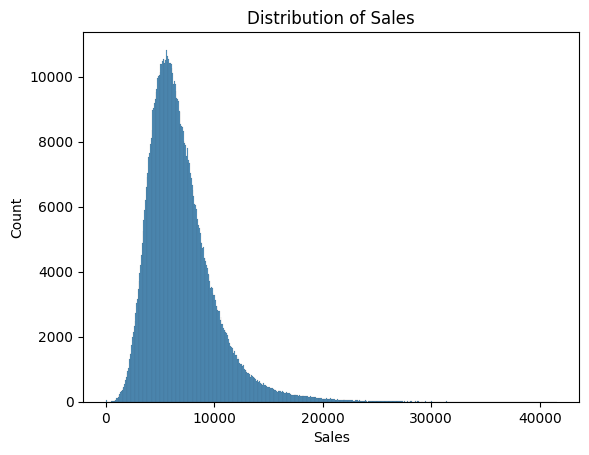

In [31]:
plt.title("Distribution of Sales")
sns.histplot(data=open_train_df, x='Sales')
plt.show()

#### Visualization - Sales Vs Customers Footfall

Let's explore some other columns. Lets see how does our Sales values change with respect to number of customers turning up in store:

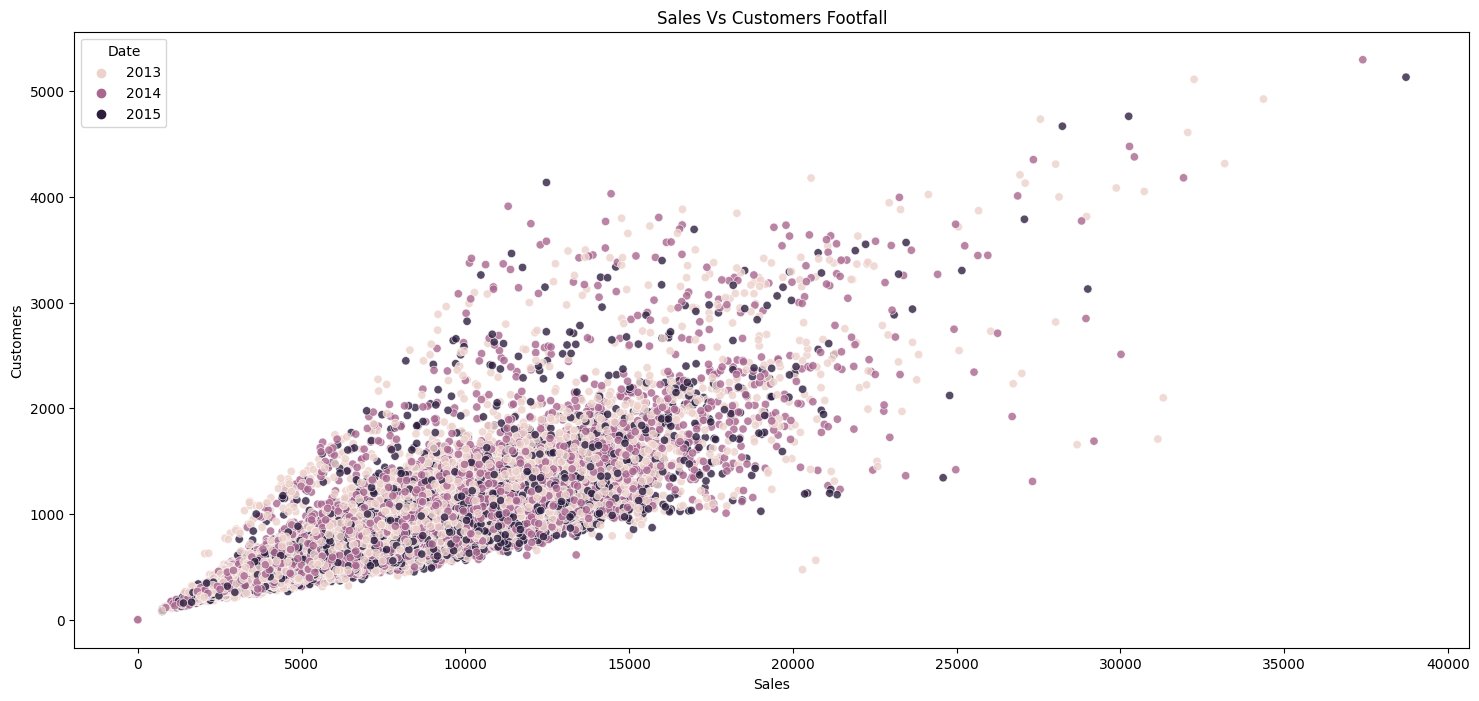

In [32]:
plt.figure(figsize=(18,8))
temp_df = open_train_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers Footfall")
plt.show()

So we can see an increasing trend here. As the number of customers increase in the store, the Sales increase, which is quite obvious!

Now lets see how the Sales values change with respect to specific store:

#### Visualization - Stores Vs Sales

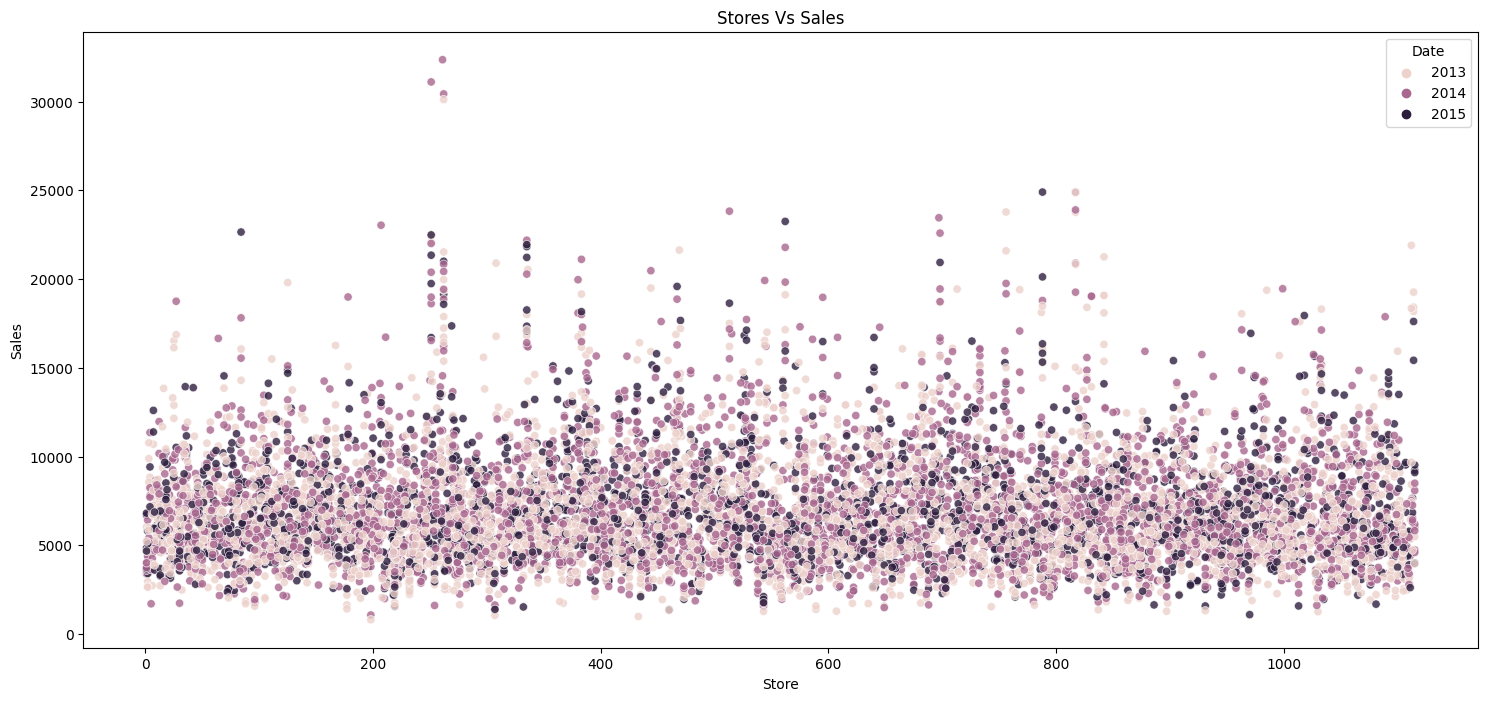

In [33]:
plt.figure(figsize=(18,8))
temp_df = open_train_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

#### Visualization - Year-wise Sales

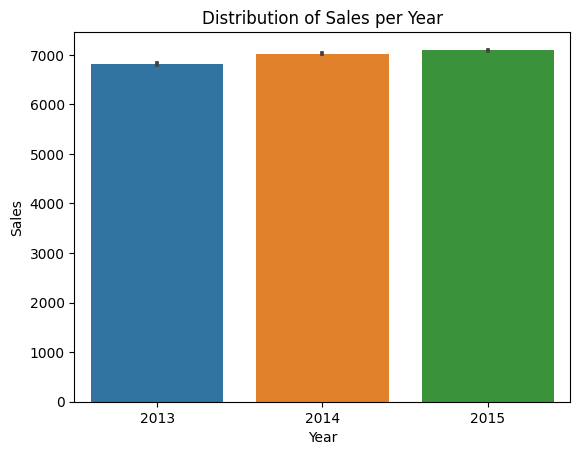

In [34]:
plt.title("Distribution of Sales per Year")
sns.barplot(data=open_train_df, x='Year', y='Sales')
plt.show()

So we see slightly increasing trend year after year!

#### Visualization - Month-wise Sales

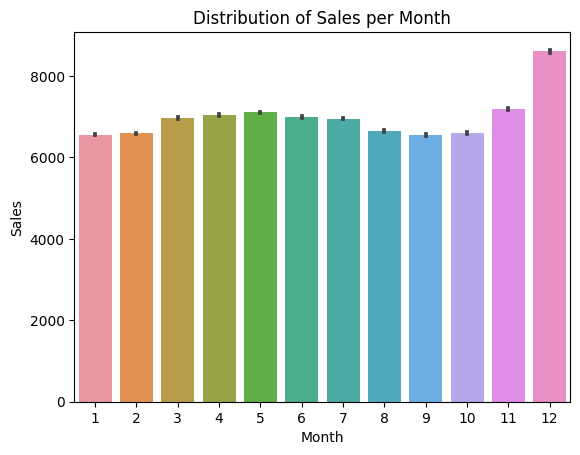

In [35]:
plt.title("Distribution of Sales per Month")
sns.barplot(data=open_train_df, x='Month', y='Sales')
plt.show()

In **December** month we have highest sale! Makes sense as people do more shopping around holidays, christmas and new year.

#### Visualization - DayOfWeek-wise Sales

Now lets check how the Sales values relate to the day of the week:

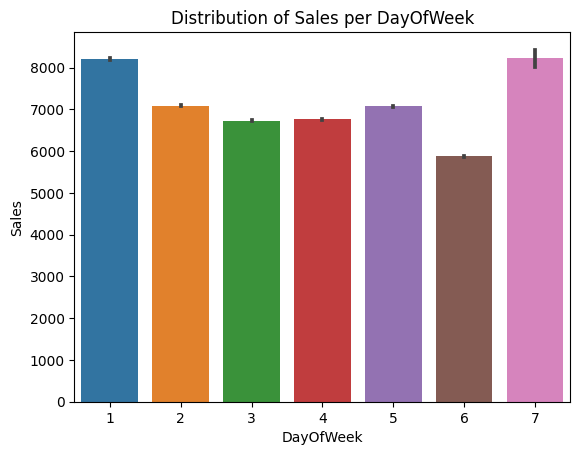

In [36]:
plt.title("Distribution of Sales per DayOfWeek")
sns.barplot(data=open_train_df, x='DayOfWeek', y='Sales')
plt.show()

1 is considered Monday here, so 7 is a weekend and it is good to see that we have more Sales on Sundays.

#### Visualization - Promo-wise Sales

Now we will see if **Promo** has any impact on the Sales or not:

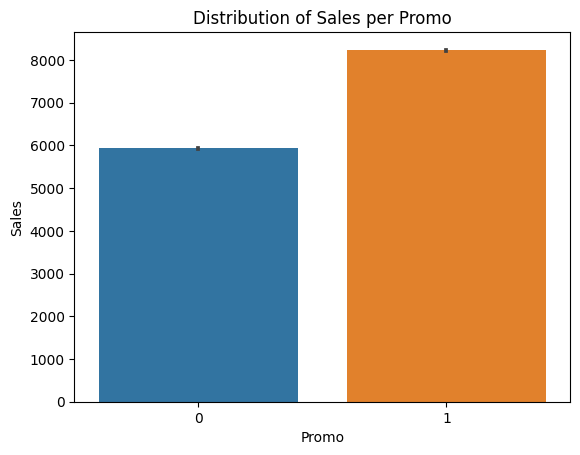

In [37]:
plt.title("Distribution of Sales per Promo")
sns.barplot(data=open_train_df, x='Promo', y='Sales')
plt.show()

So clearly, more Promos bring more sales!

#### Visualization - StoreType-wise Sales

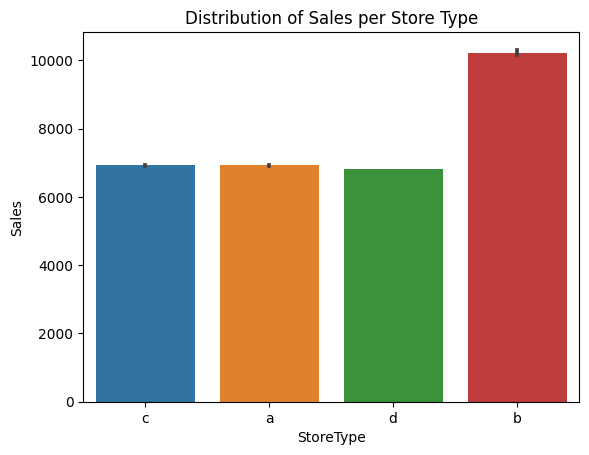

In [38]:
plt.title("Distribution of Sales per Store Type")
sns.barplot(data=open_train_df, x='StoreType', y='Sales')
plt.show()

#### Visualization - Assortment-wise Sales

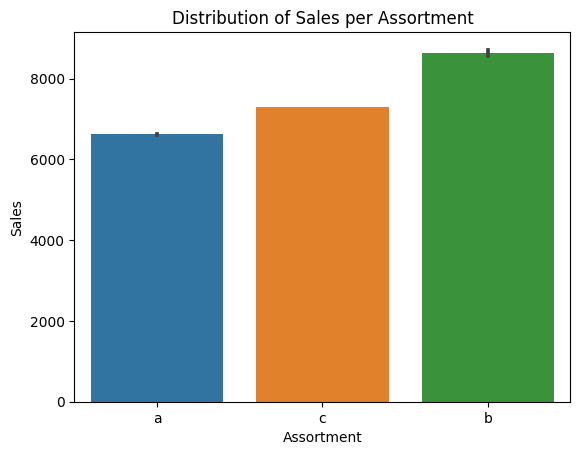

In [39]:
plt.title("Distribution of Sales per Assortment")
sns.barplot(data=open_train_df, x='Assortment', y='Sales')
plt.show()

#### Visualization - Correlation among Features

In [40]:
open_train_df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
WeekOfYear                   0.074472
Month                        0.073600
SchoolHoliday                0.038617
Year                         0.036169
CompetitionOpenSinceYear     0.016101
Store                        0.007710
CompetitionOpen             -0.003196
Promo2SinceYear             -0.034713
CompetitionDistance         -0.043124
CompetitionOpenSinceMonth   -0.043489
Day                         -0.051849
Promo2Open                  -0.060761
IsPromo2Month               -0.065369
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

If you see above results, you can tell that Customers are important criteria for determining Sales but we don't have that column in our test data. So we need to exclude this column while training our model. Also if you notice that Store is not so important predictor here, but later this might change when we see the feature importance after we are done training our model. This matrix/chart is not so convincing as far as our feature importance truely are!

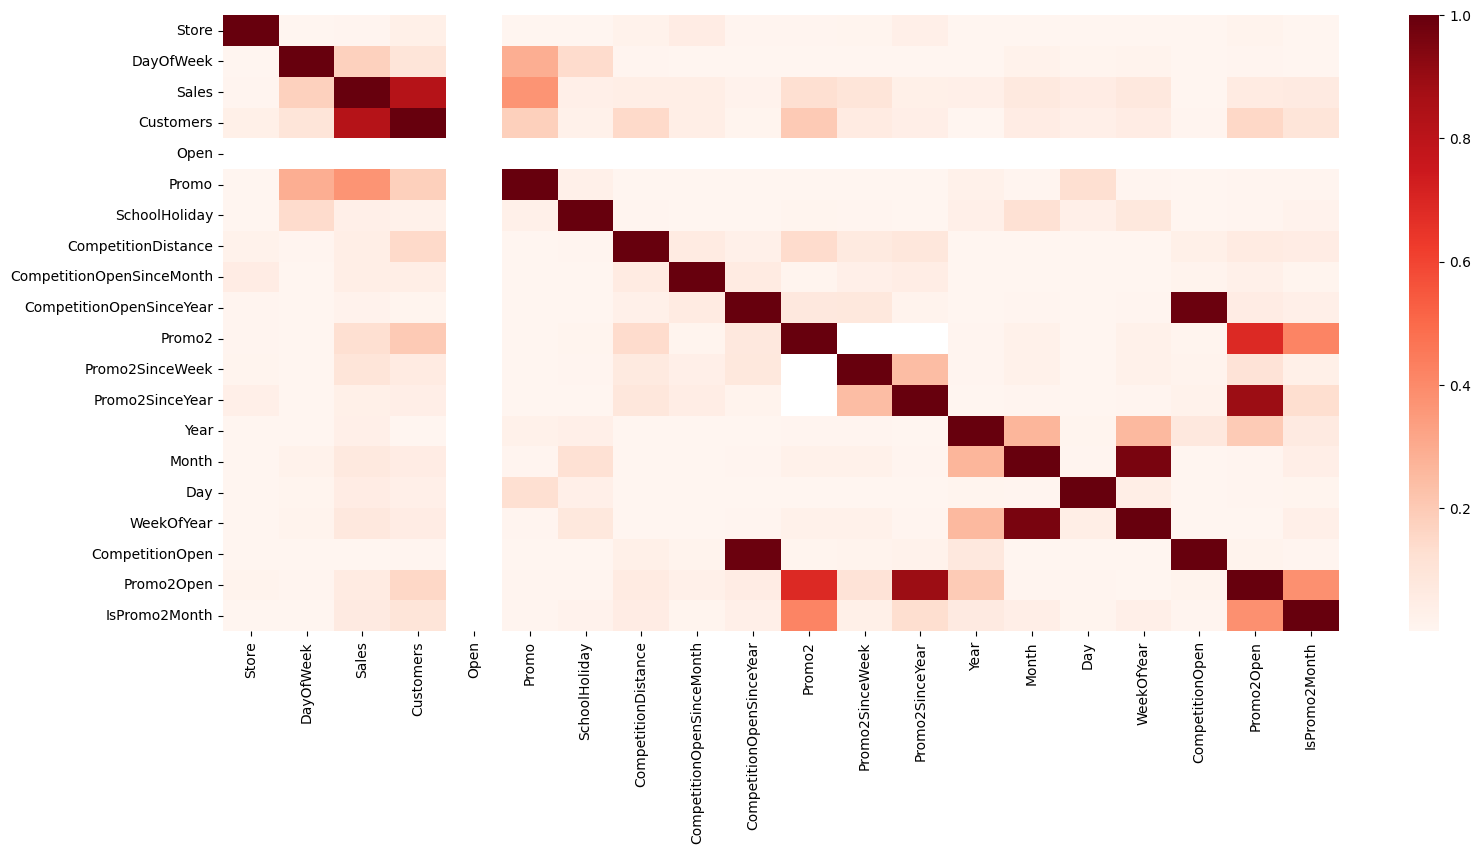

In [41]:
plt.figure(figsize=(18,8))
correlation = open_train_df.corr(numeric_only=True)
sns.heatmap(abs(correlation),  cmap='Reds')
plt.show( )

In [42]:
train_correlations = open_train_df.corr(numeric_only=True)
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1] # As we don't want the diagonal elements with values 1

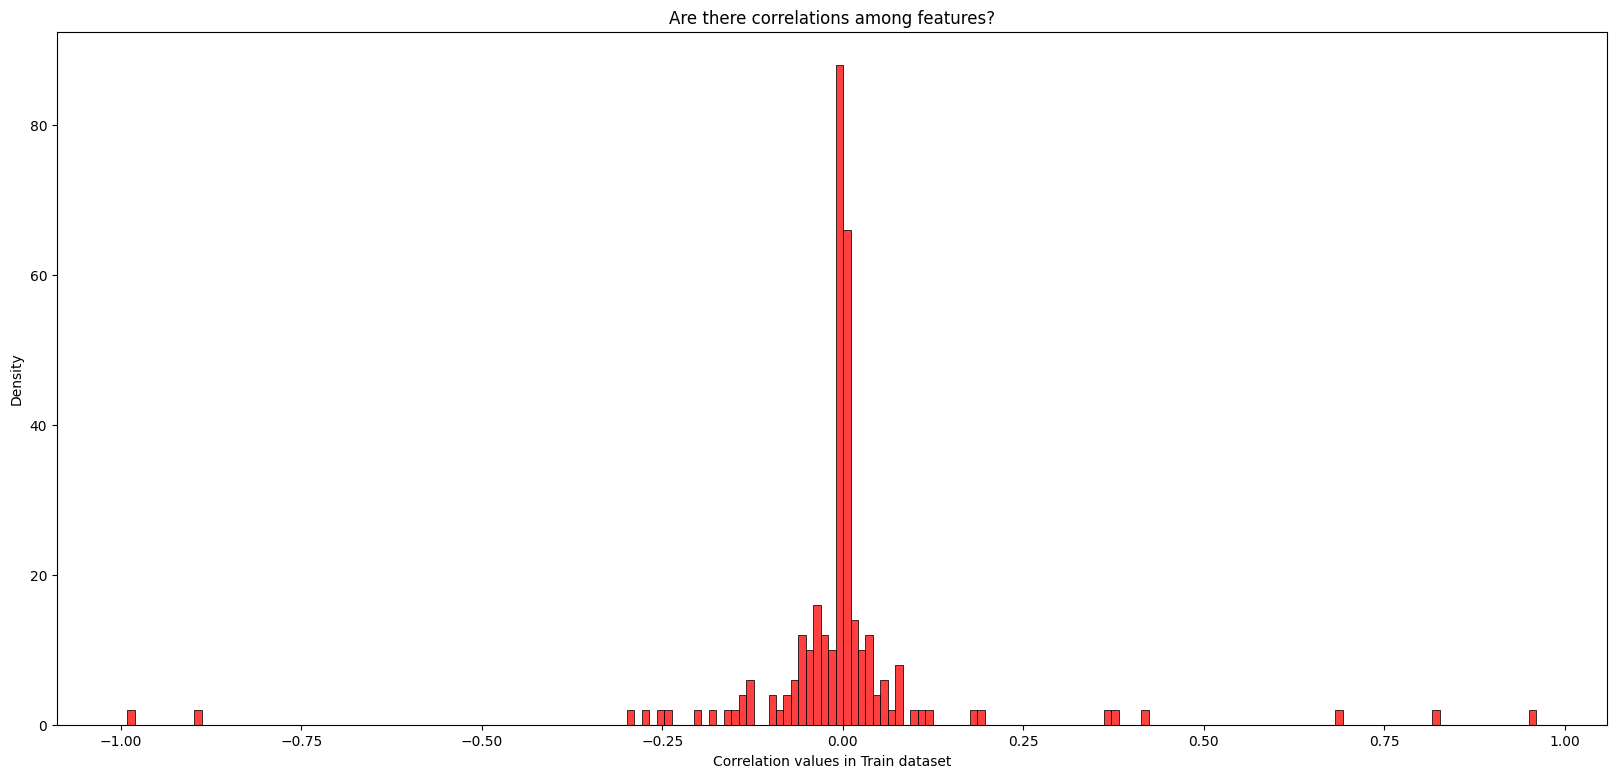

In [43]:
plt.figure(figsize=(20,9))
sns.histplot(train_correlations, color="Red", label="train")
plt.xlabel("Correlation values in Train dataset")
plt.ylabel("Density")
plt.title("Are there correlations among features?")
plt.show()

### Step 6 : Input and Target columns

Let's also identify input and target columns. Note that we can't use the number of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [44]:
open_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [45]:
input_cols = ['Store', 'DayOfWeek', 'Open','Promo', 'StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 'Promo2',
              'Day', 'Month', 'Year', 'WeekOfYear',
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

Let's also separate out numeric and categorical columns.

In [46]:
open_train_df[input_cols].nunique()

Store                  1115
DayOfWeek                 7
Open                      1
Promo                     2
StateHoliday              4
SchoolHoliday             2
StoreType                 4
Assortment                3
CompetitionDistance     654
CompetitionOpen         336
Promo2                    2
Day                      31
Month                    12
Year                      3
WeekOfYear               52
Promo2Open              566
IsPromo2Month             2
dtype: int64

In [47]:
train_inputs = open_train_df[input_cols].copy()
train_targets = open_train_df[target_col].copy()
test_inputs = merged_test_df[input_cols].copy()

Note that some columns can be treated as both numeric and categorical, and it's up to you to decide how you want to deal with them.

In [48]:
numeric_cols = ["Open","Store", "Promo","Promo2","Promo2Open","IsPromo2Month","SchoolHoliday", "CompetitionDistance","CompetitionOpen", "Day","Month","Year",'WeekOfYear']
categorical_cols = ["DayOfWeek", "StoreType","Assortment","StateHoliday"]

### Step 7 : Imputation, Scaling and Encoding

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range.

In [49]:
train_inputs[numeric_cols].isna().sum()

Open                   0
Store                  0
Promo                  0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

Now we don't have any NULL values

In [50]:
test_inputs[numeric_cols].isna().sum()

Open                   11
Store                   0
Promo                   0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
SchoolHoliday           0
CompetitionDistance     0
CompetitionOpen         0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Seems like Open is the only missing value, and we can simply fill it with 0 (to indicate that the store is not open).

In [51]:
test_inputs.fillna({'Open': 0}, inplace=True)

In [52]:
test_inputs[numeric_cols].isna().sum()

Open                   0
Store                  0
Promo                  0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

#### Scale Numeric Values

Let's also scale the values to the $(0, 1)$ range.

In [53]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encode Categorical Columns

Finally, let's encode categorical columns as one-hot vectors.

In [54]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Let's now extract out the numeric data.

In [55]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Step 8 : Training-Validation-Test Split

We are going to split our original training set into train-val-test as 80-10-10:

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_train, train_targets,test_size=0.1,random_state=4142025)

#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=4142025)

In [57]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_test:",y_test.shape)


Shape of x_train: (683956, 31)
Shape of x_val: (75996, 31)
Shape of y_train: (683956,)
Shape of y_val: (75996,)
Shape of x_test: (84440, 31)
Shape of x_test: (84440,)


### Step 9 - Create Baseline Models

<img src="https://i.imgur.com/1DLgiEz.png" width="640">

A quick baseline model helps establish the minimum score any ML model you train should achieve.


#### Model 1 : Guess Average

Let's define a model that always returns the **mean** value of **Sales** as the prediction.

In [59]:
def return_mean(inputs, outputs):
    return np.full(len(inputs), outputs.mean())

In [60]:
train_preds = return_mean(x_train, y_train)

Let's evaluate this by using the RMSE score.

In [61]:
root_mean_squared_error(train_preds, y_train)

3103.1474235233127

In [62]:
root_mean_squared_error(return_mean(x_val, y_val), y_val)

3130.7218437039983

The model is off by about **$3130** on average.

#### Model 2 : Random Guess

Let's try another model, which makes a random guess between two values.

In [63]:
def guess_random(inputs):
    lo, hi = 3000, 17000
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [64]:
train_preds = guess_random(x_train)
root_mean_squared_error(train_preds, y_train)

5929.50160825179

In [65]:
root_mean_squared_error(guess_random(x_val), y_val)

5943.5623200245445

Clearly, this model is much worse than the above model.

#### Model 3 : Linear Regression

Let's train a simple `LinearRegression` model, with no customization.

In [66]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

Then we have fit the model, the model can now be used to make predictions. Note that the parameters of the model will not be updated during prediction.

In [67]:
train_preds = linreg.predict(x_train)
root_mean_squared_error(train_preds, y_train)

2724.0009035109438

In [68]:
val_preds = linreg.predict(x_val)
root_mean_squared_error(val_preds, y_val)

2756.8696865911998

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train **should have ideally have a RMSE score lower than $2800**. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense.

### Step 10 - Pick a Strategy, Train a model

<img src="https://i.imgur.com/aRuE5mw.png" width="640">

#### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem we're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- Use a spreadsheet to keep track of our experiments and results.

I have attached screenshot of observations later on , in this notebook. Also the link as been shared on GitHub.

Let's define a function `try_model`, which takes a model, then performs training and evaluation.

In [69]:
def try_model(model):
    # Fit the model
    model.fit(x_train, y_train)

    # Generate predictions
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)

    # Compute RMSE
    train_rmse = root_mean_squared_error(y_train, train_preds)
    val_rmse = root_mean_squared_error(y_val, val_preds,)
    print(f"Training RMSE: {train_rmse:.2f} and Validation RMSE: {val_rmse:.2f}")
    return train_rmse, val_rmse

#### Linear Models

In [70]:
try_model(LinearRegression())

Training RMSE: 2724.00 and Validation RMSE: 2756.87


(2724.0009035109438, 2756.8696865911998)

So for linear regression model we got **validation RMSE** as ~**2757**

#### Model 4 : Ridge Regression

In [71]:
try_model(Ridge(alpha=0.5))

Training RMSE: 2724.00 and Validation RMSE: 2756.87


(2724.0009043770588, 2756.868361988111)

Ridge regression gave similar results.

#### Model 5 : Lasso Regression

In [72]:
try_model(Lasso())

Training RMSE: 2724.27 and Validation RMSE: 2756.66


(2724.2746954145837, 2756.662405128432)

In [73]:
try_model(Lasso(alpha=0.4, max_iter=10000, selection='cyclic', tol=0.0001))

Training RMSE: 2724.07 and Validation RMSE: 2756.65


(2724.069547544809, 2756.652249347227)

I did not do much hyperparameter tuning for these baseline models, but they were hardly any good.

#### Model 6 : ElasticNet

In [74]:
try_model(ElasticNet(max_iter=10000))

Training RMSE: 2922.47 and Validation RMSE: 2950.08


(2922.4689369648054, 2950.08011076535)

This gave worse results as you can see.

#### Model 7 : SGD Regressor

In [75]:
try_model(SGDRegressor())

Training RMSE: 2724.49 and Validation RMSE: 2756.79


(2724.4913152789363, 2756.791598647375)

#### Model 8 : Decision Tree

Now we can try some tree based models like :
* Decision trees
* Random Forests and Gradient Boosting

In [76]:
tree = DecisionTreeRegressor(random_state=42, max_depth=5)
try_model(tree)

Training RMSE: 2655.82 and Validation RMSE: 2691.26


(2655.8245535760134, 2691.2556697460286)

Seems like the **Decision Tree** performs much better than linear models.

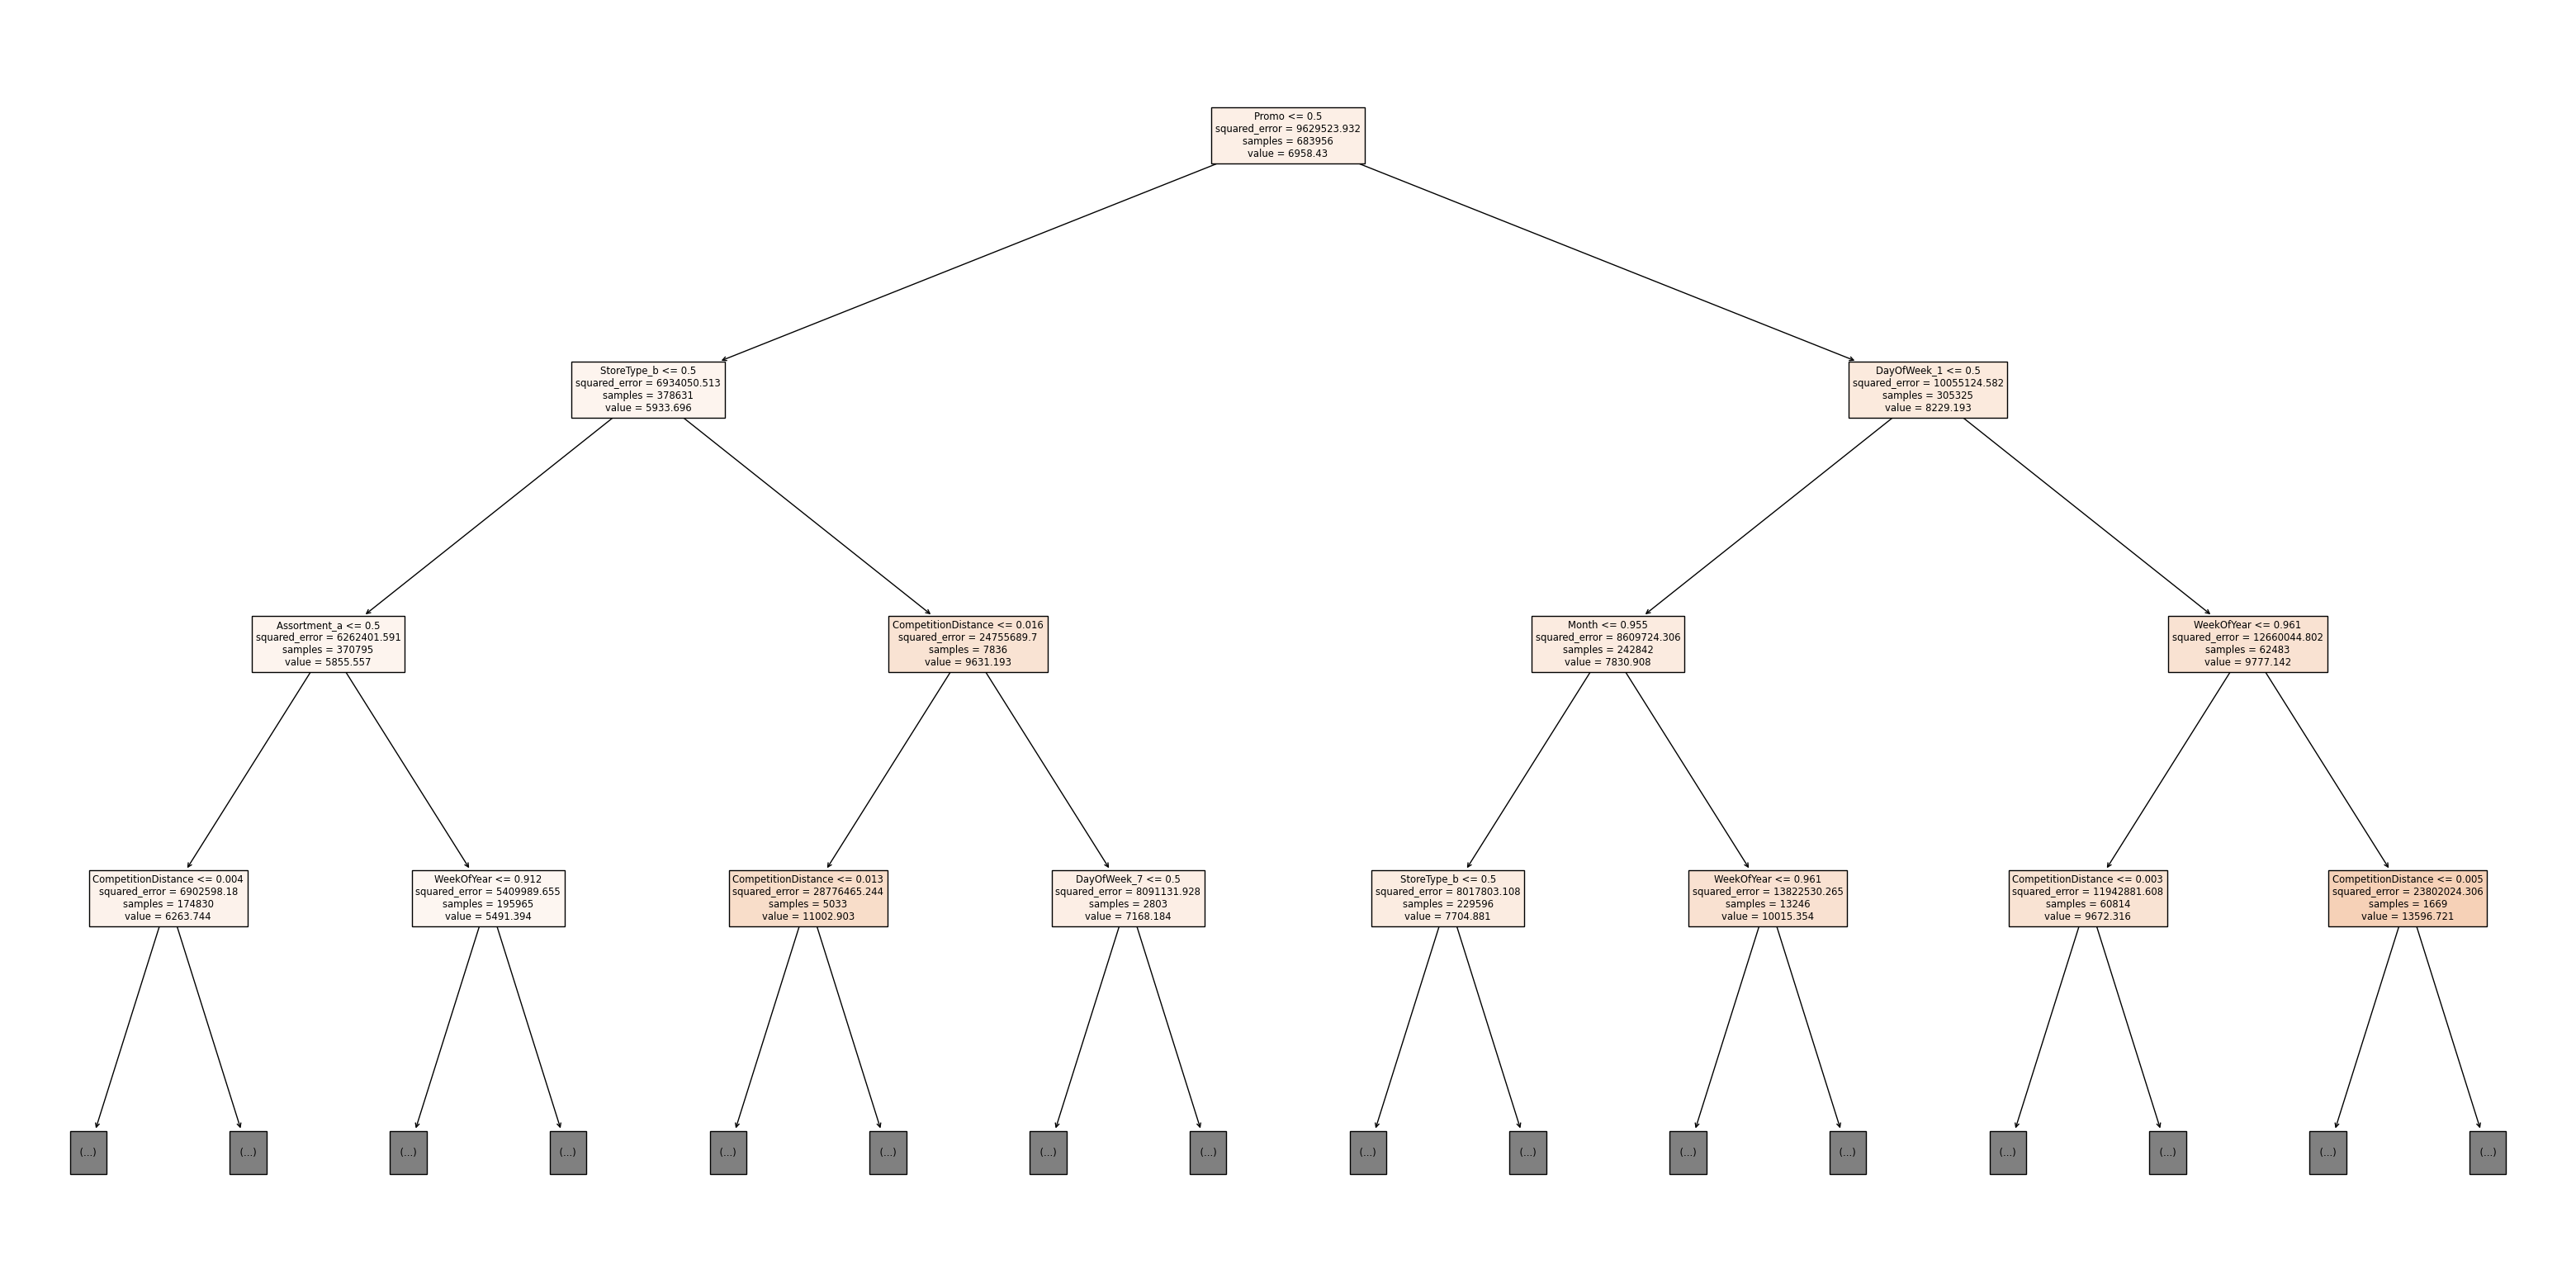

In [77]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Definitely a Decision Tree gives us a better visibility. We can see which all features it used to divide a parent node into child nodes and what were the parameters.

#### Model 9 : Random Forest

Let's try a **Random Forest**.

In [78]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=20)
try_model(rf)

Training RMSE: 387.46 and Validation RMSE: 965.69


(387.4641387111126, 965.6945335440982)

We've seen a **significant reduction in the loss by using a random forest**.We can tune the hyperparameters of the decision tree and random forest to get better results.

I did not do much hyperparameter tuning for these models, rather I chose to do it for **XGBoost** later on. But here are **my findings for all the models** I tried so far:

<img src="https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/All%20Model%20Performances.png?raw=true">

As you can see we started with random guessing and guessing just the average. That's our baseline model so that we know what is acceptable and not acceptable for our model. Random guessing was way too worse than guessing the average. But we can still do better. **Linear Regression** was better than guessing average. **Ridge** was better than Linear regression. But Lasso didn't do any better. **ElasticNet** did worse than **Lasso**. **SGD** was good but not too good. **Decision tree** was really good but it definitely overfitted on training data. **Random Forest** was **best** of all models we tried above. But We can definitely do better.

Let's try **XGBoost** now!

#### Model 10 : XGBoost

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)

##### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using `model.fit`.

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

##### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [ ]:
preds = model.predict(x_train)

##### Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
root_mean_squared_error(y_train, preds)

2396.0759638323734

In [ ]:
try_model(model)

Training RMSE: 2396.08 and Validation RMSE: 2428.45


(2396.0759638323734, 2428.448432242207)

##### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

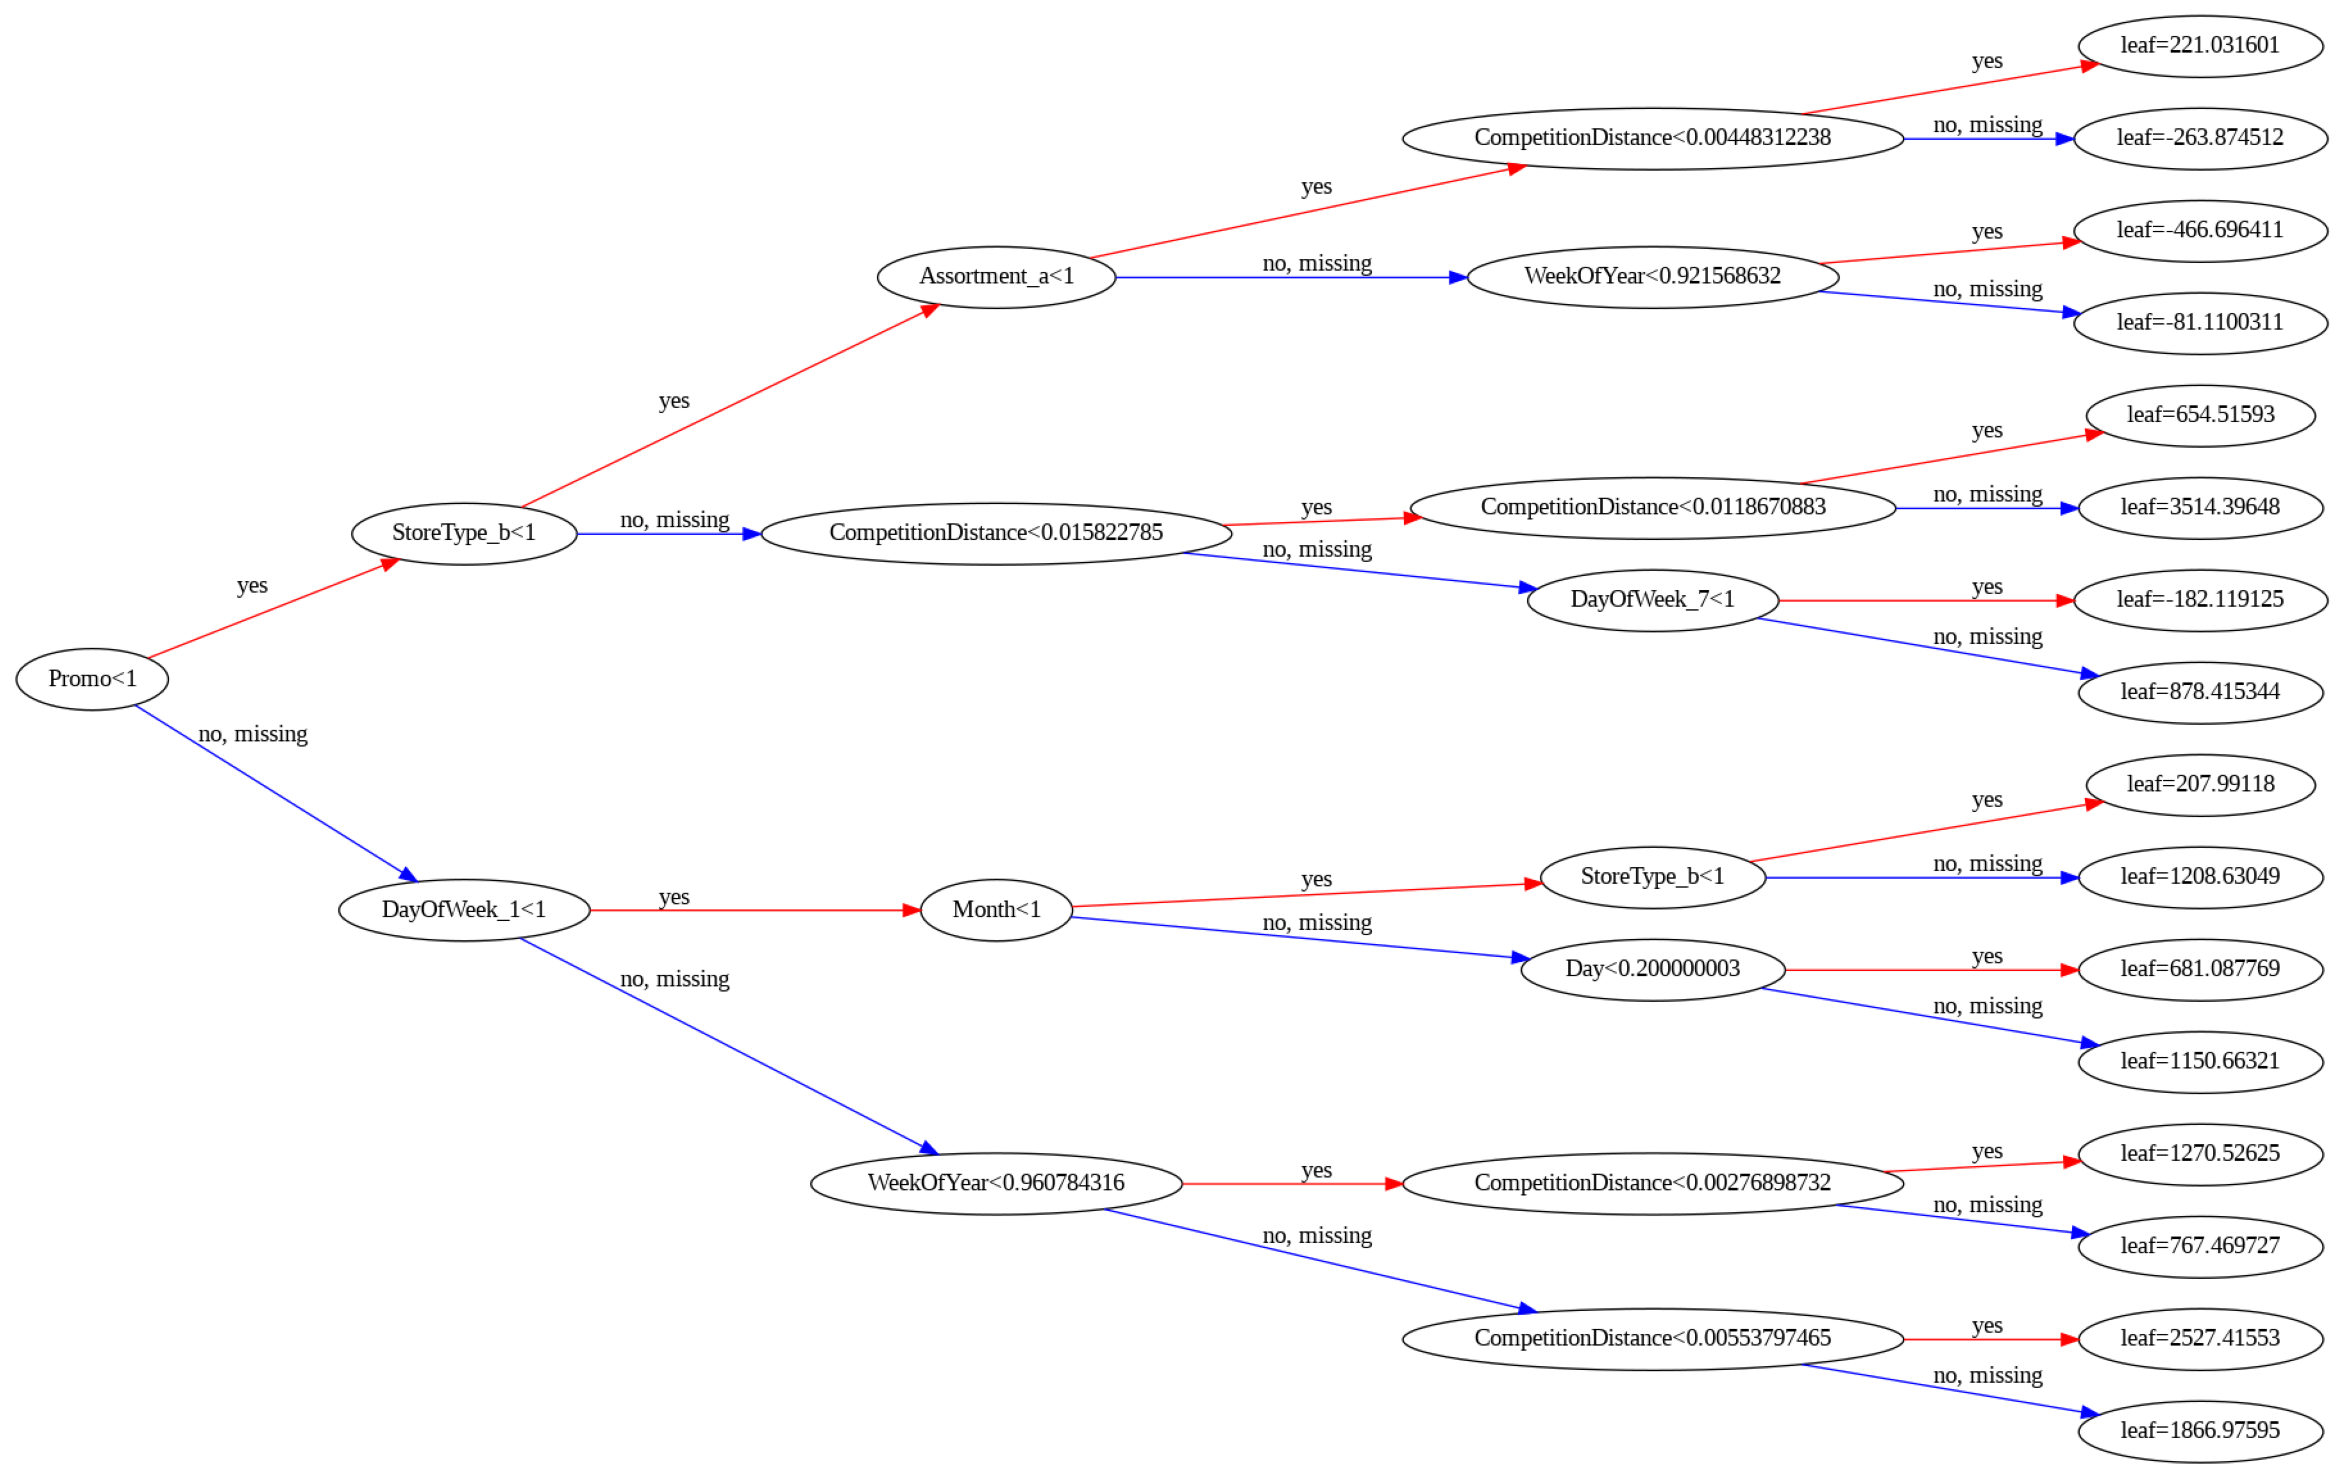

In [ ]:
plot_tree(model, rankdir='LR');

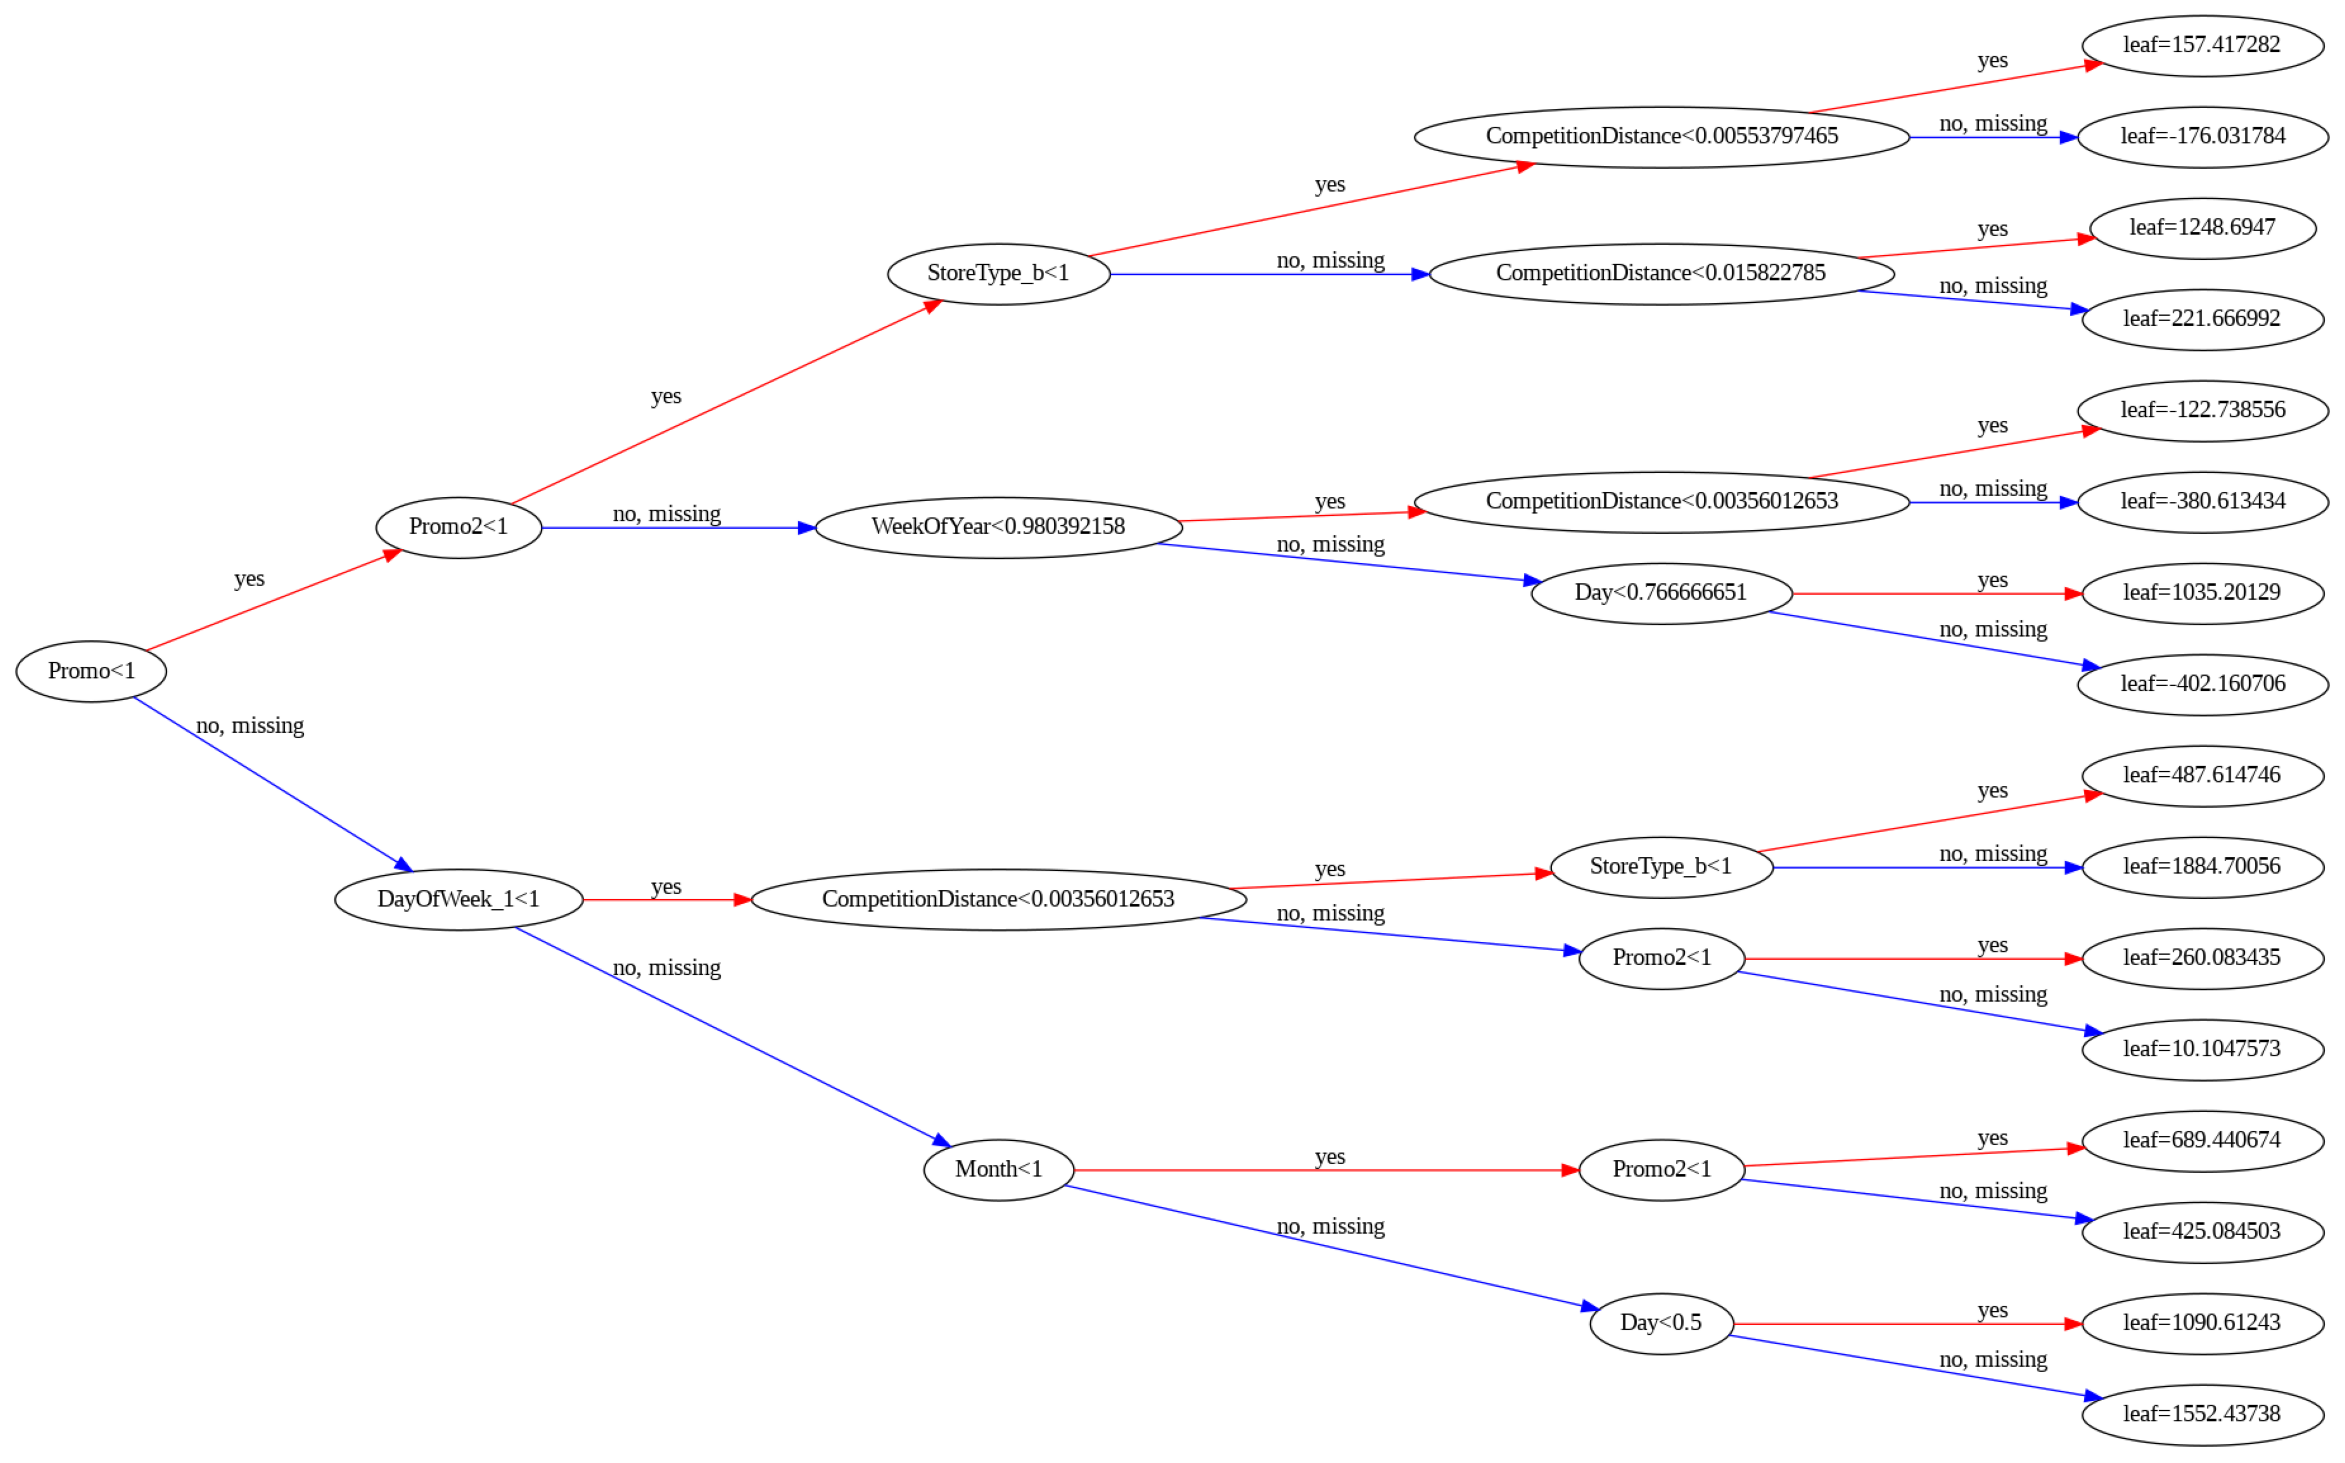

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);

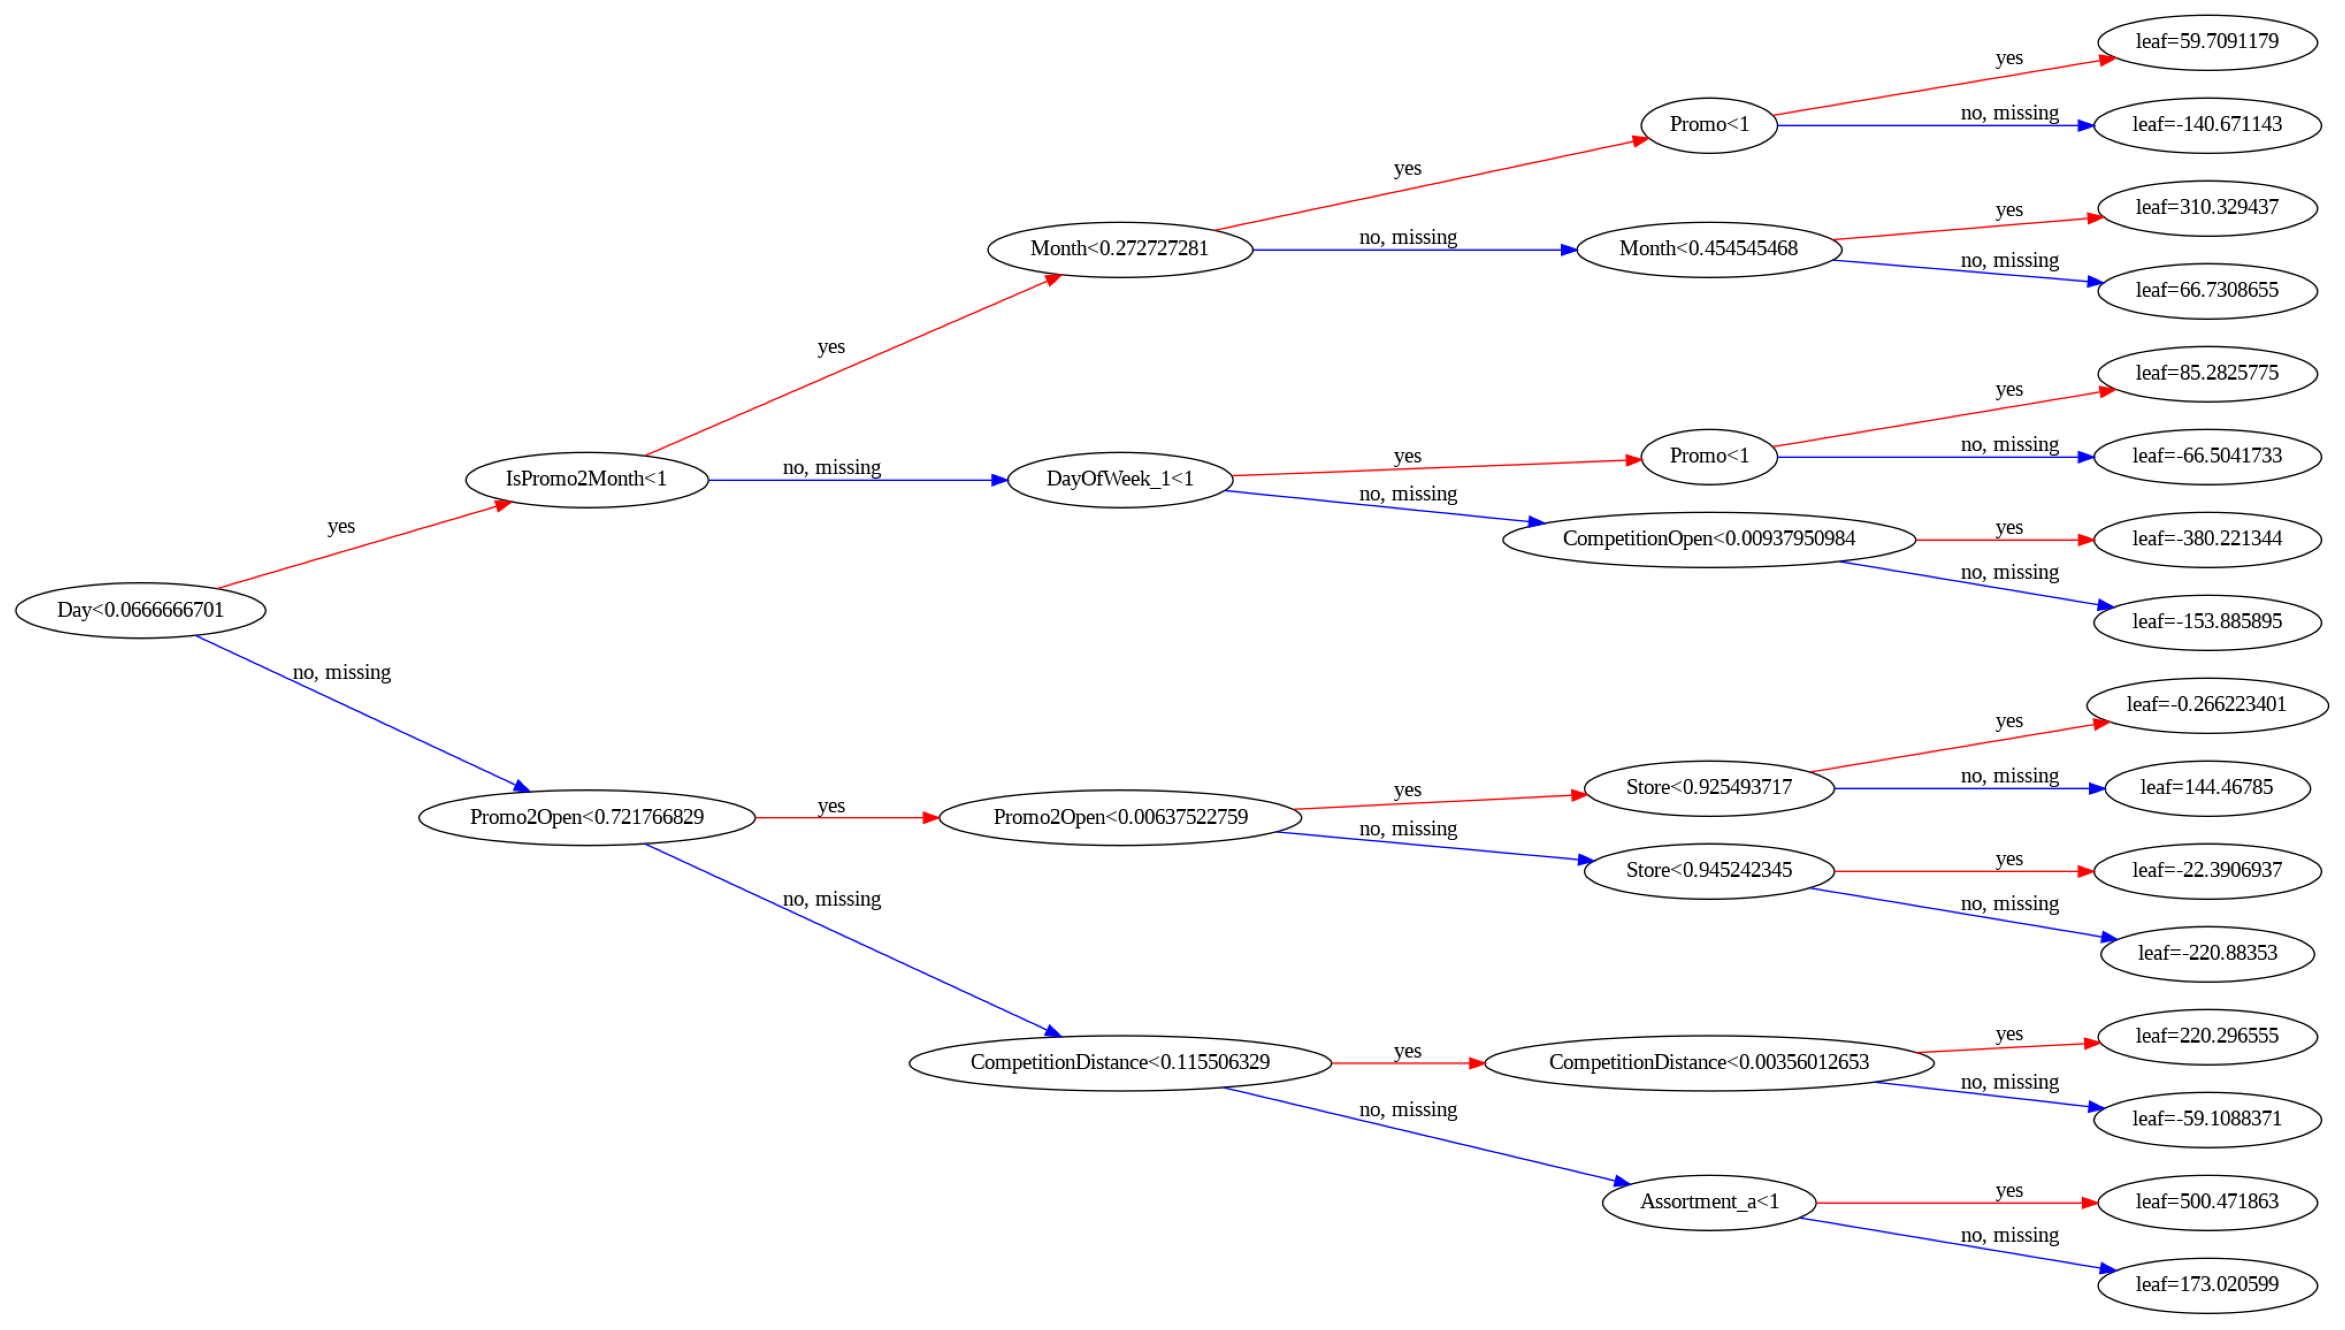

In [ ]:
plot_tree(model, rankdir='LR', num_trees=19);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [ ]:
trees = model.get_booster().get_dump()
len(trees)

20

In [ ]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.00448312238] yes=15,no=16,missing=16
				15:leaf=221.031601
				16:leaf=-263.874512
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-466.696411
				18:leaf=-81.1100311
		4:[CompetitionDistance<0.015822785] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.0118670883] yes=19,no=20,missing=20
				19:leaf=654.51593
				20:leaf=3514.39648
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-182.119125
				22:leaf=878.415344
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=207.99118
				24:leaf=1208.63049
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=681.087769
				26:leaf=1150.66321
		6:[WeekOfYear<0.960784316] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00276898732] yes=27,no=28,missing=28
				27:leaf=1270.52625
			

##### Function for getting Train and Validation errors

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(x_train, y_train)
    train_rmse = root_mean_squared_error(model.predict(x_train), y_train)
    val_rmse = root_mean_squared_error(model.predict(x_val), y_val)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

### Step 11 - Combine results from Multiple Strategies

<img src="https://i.imgur.com/ZqM6R8w.png" width="640">

In general, the following strategies can be used to improve the performance of a model:

- **Gather more data**. A greater amount of data can let you learn more relationships and generalize the model better.
- **Include more features**. The more relevant the features for predicting the target, the better the model gets.
- **Tune the hyperparameters** of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and **gather some insights**
- **Try strategies** like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (**ensembling**), or train another model using their results.

#### Hyperparameter Optimization & Grid Search

We can tune hyperparameters manually, or use an automated tuning strategy like random search or Grid search.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

##### Hyperparameter - `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [ ]:
test_params(n_estimators=10)

Train RMSE: 2338.6564708716287, Validation RMSE: 2373.1002602554913


In [ ]:
test_params(n_estimators=30)

Train RMSE: 1832.153294883268, Validation RMSE: 1862.092163096942


In [ ]:
test_params(n_estimators=100)

Train RMSE: 1152.8218020591567, Validation RMSE: 1174.487372767331


In [ ]:
test_params(n_estimators=240)

Train RMSE: 901.1887421145615, Validation RMSE: 924.7022416255263


In [ ]:
test_params(n_estimators=350)

Train RMSE: 824.1065216136059, Validation RMSE: 853.3697089249245


In [ ]:
test_params(n_estimators=500)

Train RMSE: 762.5208061154914, Validation RMSE: 799.746973828576


In [ ]:
test_params(n_estimators=700)

Train RMSE: 713.8789115642355, Validation RMSE: 761.5427277267491


In [ ]:
test_params(n_estimators=1000)

Train RMSE: 665.4246154536858, Validation RMSE: 726.4383645144097


##### Hyperparameter - `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth=2)

Train RMSE: 2368.656261543632, Validation RMSE: 2397.9355723360363


In [ ]:
test_params(max_depth=5)

Train RMSE: 1385.270498188794, Validation RMSE: 1405.1733453379497


In [ ]:
test_params(max_depth=10)

Train RMSE: 654.2393356845126, Validation RMSE: 767.2841519301661


In [ ]:
test_params(max_depth=20)

Train RMSE: 33.5133444772394, Validation RMSE: 918.2016120148902


##### Hyperparameter - `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 2786.9401024183294, Validation RMSE: 2820.8173167186724


In [ ]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2165.7444398577154, Validation RMSE: 2195.2094187027797


In [ ]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1534.6198056725038, Validation RMSE: 1557.823902737458


In [ ]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1152.1745325037625, Validation RMSE: 1167.1652155688876


In [ ]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1162.0610512570925, Validation RMSE: 1179.7265379887892


##### Hyperparameter - `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [ ]:
test_params(booster='gblinear')

Train RMSE: 2724.012114465837, Validation RMSE: 2756.84894319868


Clearly, a linear model is not well suited for this dataset.

I have consolidated all the outcomes of this model training in an excel sheet, as shown below:

<img src="https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/Model%20XGBoost%20Performance.png?raw=true">

### Step 12 : Inference

Let's train a final model on the entire training set with custom hyperparameters.

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
test_params(n_estimators=1000, learning_rate=0.2, max_depth=10, subsample=0.9, colsample_bytree=0.7)

Train RMSE: 360.87411271789995, Validation RMSE: 657.259758366315


In [ ]:
test_preds = model.predict(X_test)

Now that the model is trained, we can make predictions on the test set.

When I uploaded the predictions in Kaggle I got a public score of ~**0.14220** which is good, it is 2003rd rank in Leaderboard! The lesser the score the better. Top scores are like 0.10021, 0.10386 etc.

<img src="https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/Kaggle%20Score%20-%20XGBoost.png?raw=true">

### Step 13 : Best Model Features - Feature Importance

Most scikit-learn models offer some kind of "**Feature Importance**" score.

In [ ]:
model.feature_importances_

array([0.        , 0.04034195, 0.10976259, 0.04411263, 0.00906665,
       0.00449973, 0.00531707, 0.05642368, 0.01693588, 0.00759918,
       0.01270946, 0.00816133, 0.0076162 , 0.03773848, 0.00673757,
       0.00400673, 0.00367594, 0.00652262, 0.02470401, 0.08948319,
       0.04462869, 0.17533779, 0.03028996, 0.03248248, 0.03928664,
       0.05971427, 0.04268102, 0.0354363 , 0.01937848, 0.01457696,
       0.01077271], dtype=float32)

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

feature  importance
7   CompetitionDistance    0.255109
1                 Store    0.219478
2                 Promo    0.135097
8       CompetitionOpen    0.073755
9                   Day    0.042011
12           WeekOfYear    0.037599
13          DayOfWeek_1    0.031772
4            Promo2Open    0.031379
21          StoreType_b    0.025496
3                Promo2    0.021331

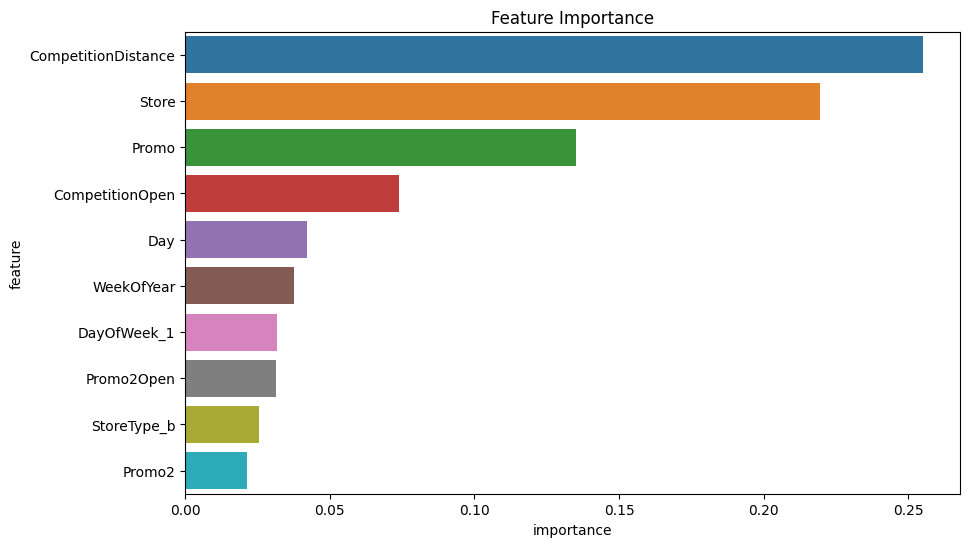

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

Looks like **CompetitionDistance** is very important and also the store!

The above chart can be presented to non-technical stakeholders to explain how the model arrives at its result. For greater explainability, a single decision tree can be used.

### Step 14 : Deep Learning Model for Prediction

Lets try a deep learning neural network for this task. This is a prediction task so neural network may not be very promising but lets see how it goes!

#### Designing DL Model Topology

While designing a **Deep Neural Network**, we need to consider a few important aspects. We have limited computing power and time, so the luxury of testing all possible combinations of architectures is simply ruled out. DL models consume significantly larger amounts of data and computing time for training. We need to judiciously design network architectures that can learn as quickly as possible.

Here are a few guidelines:

1.   **Start with small architectures.**

     In the case of DNNs, it is always advised to start with a single-layer network with around 100-300 neurons. Train the network and measure performance using the defined metrics (while efining the baseline score). If the results are not encouraging, try adding one more layer with the same number of neurons and repeating the process.
2.   **When small architectures (with two layers) fail, increase the size.**

     When the results from small networks are not great, you need to increase the number of neurons in layers by three to five times (i.e., around 1,000 neurons in each layer). Also, increase regularization to **0.3**, **0.4**, or **0.5** for both layers and repeat the process for training and performance measurement.
3.   **When larger networks with two layers fail, go deeper.**

     Try increasing the depth of the network with more and more layers while maintaining regularization with dropout layers (if required) after each dense (or your selected layer) with a dropout rate between 0.2 and 0.5.
4.   **When larger and deeper networks also fail, go even larger and even deeper.**

     In case large networks with ~1000 neurons and five or six layers also don't give the desired performance, try increasing the width and depth of the network. Try adding layers with 8,000-10,000 neurons per layer and a dropout of 0.6 to 0.8.
5.   **When everything fails, revisit the data.**

     If all the aforementioned rules fail, revisit the data for improved feature engineering and normalization, and then you will need to try other ML alternatives.



#### Baseline Sequential Neural Network Model

Lets just take 150 neurons in our hidden layer and also lets have only one hidden layer as of now. This will be our baseline model.

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation = "linear"))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
10687/10687 [==============================] - 24s 2ms/step - loss: 2588.3872 - mean_absolute_error: 2588.3872 - val_loss: 1976.3154 - val_mean_absolute_error: 1976.3154
Epoch 2/10
10687/10687 [==============================] - 38s 4ms/step - loss: 1960.9686 - mean_absolute_error: 1960.9686 - val_loss: 1962.6047 - val_mean_absolute_error: 1962.6047
Epoch 3/10
10687/10687 [==============================] - 29s 3ms/step - loss: 1949.9741 - mean_absolute_error: 1949.9741 - val_loss: 1953.3317 - val_mean_absolute_error: 1953.3317
Epoch 4/10
10687/10687 [==============================] - 25s 2ms/step - loss: 1941.1616 - mean_absolute_error: 1941.1616 - val_loss: 1945.2552 - val_mean_absolute_error: 1945.2552
Epoch 5/10
10687/10687 [==============================] - 25s 2ms/step - loss: 1932.8063 - mean_absolute_error: 1932.8063 - val_loss: 1937.3901 - val_mean_absolute_error: 1937.3901
Epoch 6/10
10687/10687 [==============================] - 27s 3ms/step - loss: 1925.5616 - mean

In [ ]:
# Using the model evalute method and predict Test data
result=model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print('Metrics:',model.metrics_names[i],':',str(round(result[i],2)))

2639/2639 [==============================] - 4s 2ms/step - loss: 1898.6469 - mean_absolute_error: 1898.6469
Metrics: loss : 1898.65
Metrics: mean_absolute_error : 1898.65


#### Improving the Model

Let us now try further improving the model performance by experimenting with a couple of more complicated architectures. In the previous network, we used **mean_absolute_error** as the **Loss** function. To improve learning in sync with our use case, we can use **mean_squared_error**.

In [ ]:
model=Sequential()
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation = "linear"))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5, batch_size=64)
# evalute the model

result=model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print('Metrics:',model.metrics_names[i],':',round(result[i],2))

Epoch 1/5
10687/10687 [==============================] - 39s 4ms/step - loss: 13392223.0000 - mean_absolute_error: 2612.0190 - val_loss: 7790277.0000 - val_mean_absolute_error: 2018.0797
Epoch 2/5
10687/10687 [==============================] - 25s 2ms/step - loss: 7540183.5000 - mean_absolute_error: 1998.5641 - val_loss: 7633311.5000 - val_mean_absolute_error: 2009.8153
Epoch 3/5
10687/10687 [==============================] - 39s 4ms/step - loss: 7443684.5000 - mean_absolute_error: 1990.4130 - val_loss: 7574886.5000 - val_mean_absolute_error: 1993.2977
Epoch 4/5
10687/10687 [==============================] - 26s 2ms/step - loss: 7380166.5000 - mean_absolute_error: 1982.5889 - val_loss: 7517433.5000 - val_mean_absolute_error: 1990.0858
Epoch 5/5
2639/2639 [==============================] - 5s 2ms/step - loss: 7248614.0000 - mean_absolute_error: 1967.5220
Metrics: loss : 7248614.0
Metrics: mean_absolute_error : 1967.52


#### Hyperparameter Tuning

These are the set of hyperparameters I modified in several iterations. So many combinations I tried to come up with the best hyperparameters.

In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 128
INPUT_DIM = X_train.shape[1]
LR_REDUCE_FACTOR = 0.5
LR_REDUCE_PATIENCE = 3
LR_MIN = 0.00001
EARLY_STOPPING_PATIENCE = 5

We also used `ReduceLROnPlateau` in this neural network model. This helps us reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a **factor** of 2-10 once learning stagnates. This **callback** monitors a quantity and if no improvement is seen for a '**patience**' number of epochs, the learning rate is reduced.

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_root_mean_squared_error', factor=LR_REDUCE_FACTOR, patience=LR_REDUCE_PATIENCE, verbose=1, mode='min', min_lr=LR_MIN)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=EARLY_STOPPING_PATIENCE)
model_checkpoint = ModelCheckpoint("model.keras", monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='min')

This neural network gave pretty good results. We have 5 hidden layers here. First layer has 1024 neurons, second layer has 512 neurons, third layer has 256 neurons, fourth layer has 128 neurons and the last hidden layer has 64 neurons.

I started with very basic architecture first, as discussed above. Later on I kept adding layers and kept monotoring our validation root mean squared error. The LESS the BETTER. So accordingly I came up with this architecture:

In [ ]:
history = History()
model = Sequential()

model.add(Dense(1024, input_dim=INPUT_DIM, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation = "linear"))

y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])
#reduce_lr, early_stopping
model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[history, model_checkpoint])

# evaluate the model
result=model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print('Metrics:',model.metrics_names[i],':',round(result[i],2))

Epoch 1/50
5331/5344 [============================>.] - ETA: 0s - loss: 7136883.0000 - root_mean_squared_error: 2671.4944
Epoch 1: val_root_mean_squared_error improved from inf to 2569.09106, saving model to model.keras
5344/5344 [==============================] - 23s 4ms/step - loss: 7135368.0000 - root_mean_squared_error: 2671.2109 - val_loss: 6600228.5000 - val_root_mean_squared_error: 2569.0911
Epoch 2/50
5337/5344 [============================>.] - ETA: 0s - loss: 6074343.5000 - root_mean_squared_error: 2464.6182
Epoch 2: val_root_mean_squared_error improved from 2569.09106 to 2425.37744, saving model to model.keras
5344/5344 [==============================] - 19s 4ms/step - loss: 6072712.5000 - root_mean_squared_error: 2464.2874 - val_loss: 5882456.0000 - val_root_mean_squared_error: 2425.3774
Epoch 3/50
5342/5344 [============================>.] - ETA: 0s - loss: 5385236.5000 - root_mean_squared_error: 2320.6111
Epoch 3: val_root_mean_squared_error improved from 2425.37744 to 23

#### Plotting the Loss Metric Across Epochs

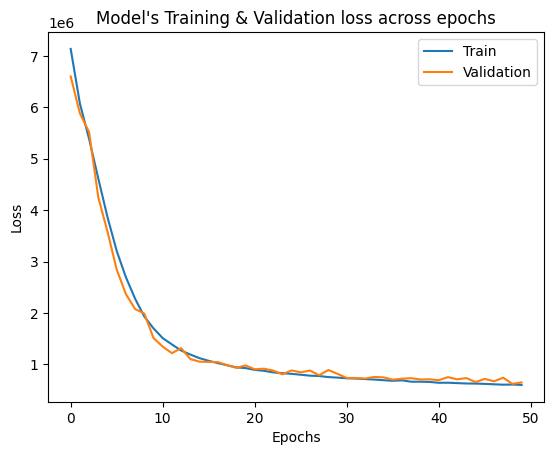

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This look good. Validation loss is kind of going hand in hand with training loss.

#### Inference

As we have saved the model weights for our best epoch so lets retreive them first and then do the inference on test data:

In [ ]:
# make sure we are using the best epoch
model.load_weights("model.keras")

In [ ]:
test_preds = model.predict(X_test)

1284/1284 [==============================] - 2s 1ms/step


I have consolidated all the outcomes of this model training in an excel sheet, as shown below:

<img src="https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/Sequential%20Neural%20Network%20Performances.png?raw=true">

### Step 13 : Generating Submission File for Kaggle

Now we can generate a submission CSV file and make a submission to check our score on the test set.

Let's add the predictions into `submission_df`.

In [ ]:
submission_df['Sales']  = test_preds

Recall, however, if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the Sales to 0. Also, there are some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * merged_test_df.Open.fillna(1.)

We can now save the predictions as a CSV file.

In [ ]:
submission_df.to_csv('MySubmission-16-Apr-DL.csv', index=None)

### Step 14 : BEST Kaggle Score

When I submitted the submission file in Kaggle I got a public score of ~**0.12597** which is 1361st rank from top! So this definitely improved!!!

<img src ='https://github.com/GVworkds/Rossmann-Store-Sales-Prediction/blob/main/Kaggle%20Score-DL.png?raw=true'>

## Conclusion

<img src="https://i.imgur.com/9axhOrA.png" width="640">

We know that XGBoost can perform well on structured data, such as that found in tabular datasets, and is often used in Kaggle competitions to achieve top performance. Neural networks, on the other hand, are better suited to unstructured data, such as images or text.

But we tried them both and saw that **Sequential Neural Networks** did better than **XGBoost**, though they required GPU resources for model training. Our Kaggle score improved from ~**0.14220** to ~**0.12597**. In this competition the lesser the score the better!

I am sure there could be further improvements in our neral network performance as well, but I could not try many iterations as it took very long every time I trained my model on Kaggle.

## Future Work

As we saw that **Sequential Neural Networks** can also be used for a **Prediction** task. I have used it for **Classification** tasks in and also for Image processing but definitely first time for such use cases. **XGBoost** also did a great job. But for future work, I would like to try LSTM models for prediction.

**Long Short-Term Memory Networks** is a deep learning, sequential neural network that allows information to persist. It is a special type of **Recurrent Neural Network** which is capable of handling the vanishing gradient problem faced by **RNN**.

They are used for cases wherein dataset has some order as far as timeline is concerned, it's a kind of timeseries analysis. And we had that kind of data with us. It was for a certain period but definitely an order was there. I did not have much time to try anything more but would like to give it a try later on for sure!

## References




These were the references I used for building this project:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners